# Google Interview Questions
#### This is a notebook for practicing. There are questions only; solutions have been removed
* Leetcode (numbered)
* Other

In the main notebook with solutions, the following questions are missing in the Google notebook because they are explained in the Facebook notebook (avoiding duplicates). Here, I copied the questions into this notebook as well for completeness.
1. __Lists and Strings__
* 15. 3Sum
* 3. Longest Substring Without Repeating Characters
* 31. Next Permutation
* 43. Multiply Strings
* 76. Minimum Window Substring

2. __Linked Lists__
* 2. Add two numbers
* 21. Merge two sorted lists
* 138. Copy List with Random Pointer

3. __Trees and Graphs___
* 124. Binary Tree Maximum Path Sum
* 200. Number of Islands
* 543. Diameter of Binary Tree

# Part I. Arrays and Strings

## 11. Container With Most Water
You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).  
Find two lines that together with the x-axis form a container, such that the container contains the most water.  
Return the maximum amount of water a container can store.  
Notice that you may not slant the container.

Input: height = [1,8,6,2,5,4,8,3,7]
Output: 49
Explanation: The above vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49.

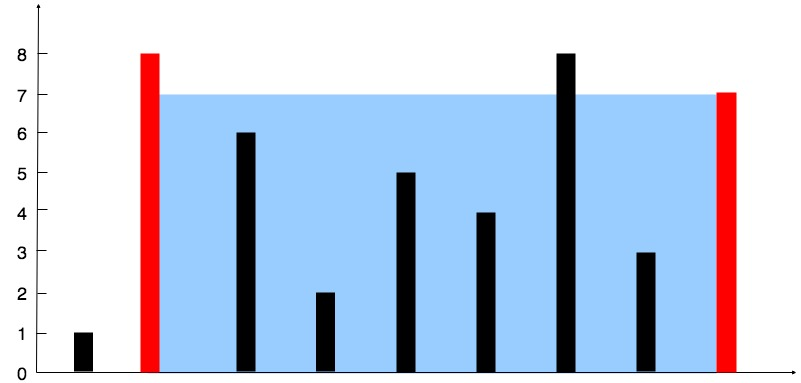

In [15]:
from typing import List

def maxArea(arr: List[int]) -> int:
    left, right = 0, len(arr)-1
    max_area = 0
    while left < right:
        max_area = max(max_area, min(arr[left],arr[right])*(right-left))
        print(left, right, max_area)
        if arr[left] <= arr[right]:
            left += 1
        else:
            right -= 1    
    return max_area

        
height = [1,8,6,2,5,4,8,3,8]
maxArea(height)    # 56

0 8 8
1 8 56
2 8 56
3 8 56
4 8 56
5 8 56
6 8 56
7 8 56


56

## 844. Backspace String Compare

Given two strings s and t, return true if they are equal when both are typed into empty text editors. '#' means a backspace character.  
Note that after backspacing an empty text, the text will continue empty. 

Example 1:  
Input: s = "ab#c", t = "ad#c"
Output: true
Explanation: Both s and t become "ac".

Example 2:  
Input: s = "ab##", t = "c#d#"
Output: true
Explanation: Both s and t become "".

Example 3:  
Input: s = "a#c", t = "b"
Output: false
Explanation: s becomes "c" while t becomes "b". 

Constraints:
* 1 <= s.length, t.length <= 200
* s and t only contain lowercase letters and '#' characters.

Follow up: Can you solve it in O(n) time and O(1) space?

In [20]:
def clean(s):
    stack = ''
    for c in s:
        if c != '#':
            stack += c
        else:
            stack = stack[:-1] if stack else stack
    return stack

def backspaceCompare(s: str, t: str)->bool:
    return clean(s) == clean(t)

strings = [ ("ab#c", "ad#c"), ("ab##", "c#d#"), ("a#c","b"),]
for s, t in strings:
    print( backspaceCompare(s, t) )

True
True
False


In [17]:
'ab'[:-1]

'a'

### 15. 3Sum
Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.  
Notice that the solution set must not contain duplicate triplets.

Example 1:  
Input: nums = [-1,0,1,2,-1,-4]  
Output: [[-1,-1,2],[-1,0,1]]  

Example 2:  
Input: nums = []  
Output: []  

Example 3:  
Input: nums = [0]  
Output: []  
 

Constraints:
* 0 <= nums.length <= 3000
* -10**5 <= nums[i] <= 10**5 

In [24]:
from typing import List
def threeSum(nums: List[int]) -> List[List[int]]:
    nums.sort()
    n = len(nums)
    res = set()
    for i in range(n-2):
        l = i+1
        r = n-1
        while l < r:
            sum_ = nums[i]+nums[l]+nums[r]
            if sum_ > 0:
                r -= 1
            elif sum_ < 0:
                l += 1
            else:
                res.add((nums[i], nums[l], nums[r]))
                l += 1
                r -= 1
    return list(res)



a1 = [-1, 0, 1, 2, -1, -4]
a2 = []
a3 = [0]

for a in [a1, a2, a3]:
    print( threeSum(a) )

# OUTPUT    
#[(-1, -1, 2), (-1, 0, 1)]
#[]
#[]

[(-1, 0, 1), (-1, -1, 2)]
[]
[]


### 3. Longest Substring Without Repeating Characters
Given a string s, find the length of the longest substring without repeating characters.

Example 1:   
Input: s = "abcabcbb"  
Output: 3  
Explanation: The answer is "abc", with the length of 3.

Example 2:  
Input: s = "bbbbb"  
Output: 1  
Explanation: The answer is "b", with the length of 1.

Example 3:  
Input: s = "pwwkew"  
Output: 3  
Explanation: The answer is "wke", with the length of 3.  
Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.

Example 4:  
Input: s = ""  
Output: 0 

Constraints:
* 0 <= s.length <= 5 * 104
* s consists of English letters, digits, symbols and spaces

In [58]:
from collections import defaultdict
def lengthOfLongestSubstring(s: str) -> int:

    
s1 = 'abcbacbb'
s2 = 'bbbbb'
s3 = 'pwwkew'
s4 = ''

# 3,1,3,0
for s in [s1, s2, s3, s4]:
    print( lengthOfLongestSubstring(s), end=', ' )
    
print()    
for s in [s1, s2, s3, s4]:
    print( lengthOfLongestSubstring2(s), end=', ' )
#3, 1, 3, 0, 
#3, 1, 3, 0,

3, 1, 3, 0, 
3, 1, 3, 0, 

### 31. Next Permutation

Implement next permutation, which rearranges numbers into the lexicographically next greater permutation of numbers. If such an arrangement is not possible, it must rearrange it as the lowest possible order (i.e., sorted in ascending order). The replacement must be in place and use only constant extra memory.

Example 1:
Input: nums = [1,2,3]
Output: [1,3,2]

Example 2:
Input: nums = [3,2,1]
Output: [1,2,3]

Example 3:
Input: nums = [1,1,5]
Output: [1,5,1]

Example 4:
Input: nums = [1]
Output: [1]

Constraints:
* 1 <= nums.length <= 100
* 0 <= nums[i] <= 100

In [10]:
def nextPermutation(nums: List[int]) -> None:
        
a1 = [1,2,3]
a2 = [3,2,1]
a3 = [1,1,5]
a4 = [1]

for a in [a1, a2, a3, a4]:
    nextPermutation(a)
    print(a)

#OUTPUT
#[1, 3, 2]
#[1, 2, 3]
#[1, 5, 1]
#[1]

[1, 3, 2]
[1, 2, 3]
[1, 5, 1]
[1]


### 43. Multiply Strings
Myltiply two non-negative ints num1, num2 represented as str, return product as str. Cannot use libraries.

Example 1:
Input: num1 = "2", num2 = "3"
Output: "6"

Example 2:
Input: num1 = "123", num2 = "456"
Output: "56088"

Constraints:
* 1 <= num1.length, num2.length <= 200
* num1 and num2 consist of digits only.
* Both num1 and num2 do not contain any leading zero, except the number 0 itself

In [ ]:
def multiply(num1, num2):
        """
        :type num1: str
        :type num2: str
        :rtype: str
        """
        
num1 = '123'
num2 = '456'
multiply2(num1, num2)
#'56088'### 43. Multiply Strings

### 76. Minimum Window Substring
Two strings s, t w/len m, n. Return minimum contiguous substring of s that includes each char in t (including duplicates). Return '' if none

Answer in testcases is unique.

Example 1:  
Input: s = "ADOBECODEBANC", t = "ABC"  
Output: "BANC"  
Explanation: The minimum window substring "BANC" includes 'A', 'B', and 'C' from string t.

Example 2:
Input: s = "a", t = "a"  
Output: "a"  
Explanation: The entire string s is the minimum window.  

Example 3:  
Input: s = "a", t = "aa"  
Output: ""  
Explanation: Both 'a's from t must be included in the window.  
Since the largest window of s only has one 'a', return empty string.

Constraints:
* m == s.length
* n == t.length
* 1 <= m, n <= 105
* s and t consist of uppercase and lowercase English letters. 

Follow up: Could you find an algorithm that runs in O(m + n) time?

In [73]:
def minWindow(s: str, t: str) -> str:


s = "ADOBECODEBANC"
t = "ABC"
minWindow(s, t)
#'BANC'

'BANC'

In [4]:
samples = [ ("ADOBECODEBANC", "ABC"), ("a", "a"), ("a", "aa") ]
for sample in samples:
    print(minWindow(sample[0], sample[1]))
#Output: "BANC"
#Output: "a"
#Output: ""

BANC
a



## 809. Expressive Words

Sometimes people repeat letters to represent extra feeling. For example:

"hello" -> "heeellooo"
"hi" -> "hiiii"
In these strings like "heeellooo", we have groups of adjacent letters that are all the same: "h", "eee", "ll", "ooo".

You are given a string s and an array of query strings words. A query word is stretchy if it can be made to be equal to s by any number of applications of the following extension operation: choose a group consisting of characters c, and add some number of characters c to the group so that the size of the group is three or more.

For example, starting with "hello", we could do an extension on the group "o" to get "hellooo", but we cannot get "helloo" since the group "oo" has a size less than three. Also, we could do another extension like "ll" -> "lllll" to get "helllllooo". If s = "helllllooo", then the query word "hello" would be stretchy because of these two extension operations: query = "hello" -> "hellooo" -> "helllllooo" = s.
Return the number of query strings that are stretchy.

Example 1:
Input: s = "heeellooo", words = ["hello", "hi", "helo"]
Output: 1
Explanation: 
We can extend "e" and "o" in the word "hello" to get "heeellooo".
We can't extend "helo" to get "heeellooo" because the group "ll" is not size 3 or more.

Example 2:
Input: s = "zzzzzyyyyy", words = ["zzyy","zy","zyy"]
Output: 3

Constraints:
* 1 <= s.length, words.length <= 100
* 1 <= words[i].length <= 100
* s and words[i] consist of lowercase letters.

In [2]:
def expressiveWords(s, words):
    pass

s = "heeellooo"
words = ["hello", "hi", "helo"]
expressiveWords(s, words)    # 1

## 159. Longest Substring with At Most Two Distinct Characters
## 340. Longest Substring with At Most K Distinct Characters

Given a string s, return the length of the longest substring that contains at most two distinct characters.

Example 1:
Input: s = "eceba"
Output: 3
Explanation: The substring is "ece" which its length is 3.

Example 2:
Input: s = "ccaabbb"
Output: 5
Explanation: The substring is "aabbb" which its length is 5.

Constraints:
* 1 <= s.length <= 105
* s consists of English letters.

_using the hashmap one knows that the rightmost position of each character, so one has to move left pointer in the position left_idx + 1 to exclude the character from the sliding window_

In [11]:
def lengthOfLongestSubstringTwoDistinct(s):


s = "ccaabbb"
lengthOfLongestSubstringTwoDistinct(s)     # 5

5

## 55. Jump Game

You are given an integer array nums. You are initially positioned at the array's first index, and each element in the array represents your maximum jump length at that position.  
Return true if you can reach the last index, or false otherwise.

Example 1:
Input: nums = [2,3,1,1,4]
Output: true
Explanation: Jump 1 step from index 0 to 1, then 3 steps to the last index.

Example 2:
Input: nums = [3,2,1,0,4]
Output: false
Explanation: You will always arrive at index 3 no matter what. Its maximum jump length is 0, which makes it impossible to reach the last index.

Constraints:
* 1 <= nums.length <= 10**4
* 0 <= nums[i] <= 10**5

In [28]:
def canJump(nums):

    
nums = [2,3,1,1,4]        # True
nums = [3,2,1,0,4]        # False
canJump(nums)

False

## 48. Rotate Image (matrix 90 deg. in place)

You are given an n x n 2D matrix representing an image, rotate the image by 90 degrees (clockwise).  
You have to rotate the image in-place, which means you have to modify the input 2D matrix directly. DO NOT allocate another 2D matrix and do the rotation.

Example 1:  
Input: matrix = [[1,2,3],[4,5,6],[7,8,9]]  
Output: [[7,4,1],[8,5,2],[9,6,3]]
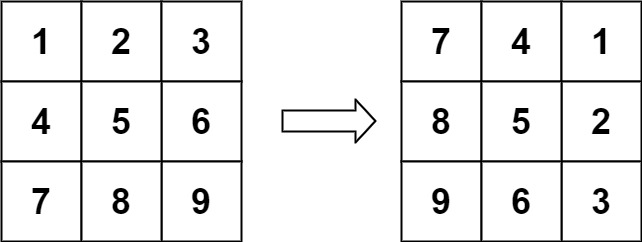

Example 2:  
Input: matrix = [[5,1,9,11],[2,4,8,10],[13,3,6,7],[15,14,12,16]]  
Output: [[15,13,2,5],[14,3,4,1],[12,6,8,9],[16,7,10,11]]
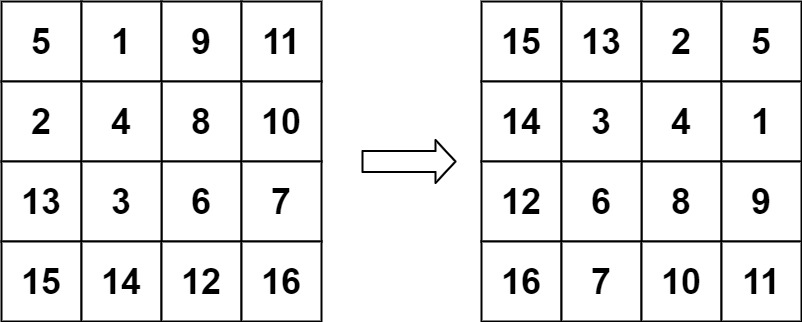

Constraints:
* n == matrix.length == matrix[i].length
* 1 <= n <= 20
* -1000 <= matrix[i][j] <= 1000

In [30]:
def rotate():

                
matrix = [[1,2,3],[4,5,6],[7,8,9]]     # Output = [[7, 4, 1], [8, 5, 2], [9, 6, 3]]

[[7, 4, 1], [8, 5, 2], [9, 6, 3]]


## 66. Plus One

You are given a large integer represented as an integer array digits, where each digits[i] is the ith digit of the integer. The digits are ordered from most significant to least significant in left-to-right order. The large integer does not contain any leading 0's.  
Increment the large integer by one and return the resulting array of digits.

Example 1:  
Input: digits = [1,2,3]
Output: [1,2,4]
Explanation: The array represents the integer 123.
Incrementing by one gives 123 + 1 = 124.
Thus, the result should be [1,2,4].

Example 2:  
Input: digits = [4,3,2,1]
Output: [4,3,2,2]
Explanation: The array represents the integer 4321.
Incrementing by one gives 4321 + 1 = 4322.
Thus, the result should be [4,3,2,2].

Example 3:  
Input: digits = [9]
Output: [1,0]
Explanation: The array represents the integer 9.
Incrementing by one gives 9 + 1 = 10.
Thus, the result should be [1,0].

Constraints:
* 1 <= digits.length <= 100
* 0 <= digits[i] <= 9
* digits does not contain any leading 0's.

In [33]:
# time O(n), space O(n)
def plusOne(digits):

    
digits = [9, 9, 9]    # [1, 0, 0, 0]
plusOne(digits)

[1, 0, 0, 0]

## 681. Next Closest Time
Given a time represented in the format "HH:MM", form the next closest time by reusing the current digits. There is no limit on how many times a digit can be reused.  
You may assume the given input string is always valid. For example, "01:34", "12:09" are all valid. "1:34", "12:9" are all invalid.

Example 1:
Input: time = "19:34"
Output: "19:39"
Explanation: The next closest time choosing from digits 1, 9, 3, 4, is 19:39, which occurs 5 minutes later.
It is not 19:33, because this occurs 23 hours and 59 minutes later.

Example 2:
Input: time = "23:59"
Output: "22:22"
Explanation: The next closest time choosing from digits 2, 3, 5, 9, is 22:22.
It may be assumed that the returned time is next day's time since it is smaller than the input time numerically.

Constraints:
* time.length == 5
* time is a valid time in the form "HH:MM".
* 0 <= HH < 24
* 0 <= MM < 60

In [42]:
def nextClosestTime(time):

    
times = ["19:34", "23:59"]
for time in times:
    print(nextClosestTime(time))     # 19:39, 22:22

19:39
22:22


## 163. Missing Ranges
You are given an inclusive range [lower, upper] and a sorted unique integer array nums, where all elements are in the inclusive range.  
A number x is considered missing if x is in the range [lower, upper] and x is not in nums.  
Return the smallest sorted list of ranges that cover every missing number exactly. That is, no element of nums is in any of the ranges, and each missing number is in one of the ranges.  
Each range [a,b] in the list should be output as:
* "a->b" if a != b
* "a" if a == b

Example 1:
Input: nums = [0,1,3,50,75], lower = 0, upper = 99
Output: ["2","4->49","51->74","76->99"]
Explanation: The ranges are:
[2,2] --> "2"
[4,49] --> "4->49"
[51,74] --> "51->74"
[76,99] --> "76->99"

Example 2:
Input: nums = [-1], lower = -1, upper = -1
Output: []
Explanation: There are no missing ranges since there are no missing numbers.

Constraints:
* -109 <= lower <= upper <= 109
* 0 <= nums.length <= 100
* lower <= nums[i] <= upper
* All the values of nums are unique.

In [44]:
def findMissingRanges(nums, lower, upper):

nums = [0,1,3,50,75]
lower = 0
upper = 99
findMissingRanges(nums, lower, upper)    # ['2', '4->49', '51->74', '76->99']

['2', '4->49', '51->74', '76->99']

## Find And Replace in String
You are given a 0-indexed string s that you must perform k replacement operations on. The replacement operations are given as three 0-indexed parallel arrays, indices, sources, and targets, all of length k.  
To complete the ith replacement operation:
* Check if the substring sources[i] occurs at index indices[i] in the original string s.
* If it does not occur, do nothing.
* Otherwise if it does occur, replace that substring with targets[i].
* For example, if s = "abcd", indices[i] = 0, sources[i] = "ab", and targets[i] = "eee", then the result of this replacement will be "eeecd".

All replacement operations must occur simultaneously, meaning the replacement operations should not affect the indexing of each other. The testcases will be generated such that the replacements will not overlap.

For example, a testcase with s = "abc", indices = [0, 1], and sources = ["ab","bc"] will not be generated because the "ab" and "bc" replacements overlap.
Return the resulting string after performing all replacement operations on s.

A substring is a contiguous sequence of characters in a string.

Example 1:
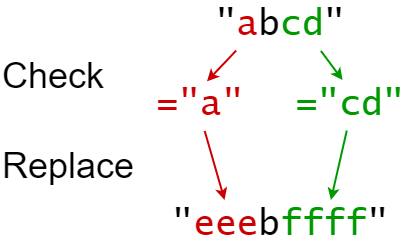
Input: s = "abcd", indices = [0, 2], sources = ["a", "cd"], targets = ["eee", "ffff"]
Output: "eeebffff"
Explanation:
"a" occurs at index 0 in s, so we replace it with "eee".
"cd" occurs at index 2 in s, so we replace it with "ffff".

Example 2:
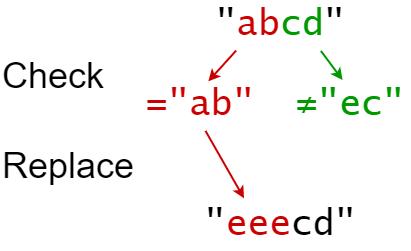
Input: s = "abcd", indices = [0, 2], sources = ["ab","ec"], targets = ["eee","ffff"]
Output: "eeecd"
Explanation:
"ab" occurs at index 0 in s, so we replace it with "eee".
"ec" does not occur at index 2 in s, so we do nothing.

Constraints:
* 1 <= s.length <= 1000
* k == indices.length == sources.length == targets.length
* 1 <= k <= 100
* 0 <= indexes[i] < s.length
* 1 <= sources[i].length, targets[i].length <= 50
* s consists of only lowercase English letters.
* sources[i] and targets[i] consist of only lowercase English letters.

In [47]:
def findReplaceString(s, indices, sources, targets):


s = "abcd"
indices = [0, 2]
sources = ["a", "cd"]
targets = ["eee", "ffff"]
print(findReplaceString(s, indices, sources, targets))    # 'eeebffff'

s = "abcd"
indices = [0, 2]
sources = ["a", "ec"]
targets = ["eee", "ffff"]
print(findReplaceString(s, indices, sources, targets))    # 'eeebcd'

'eeebffff'

## 849. Maximize Distance to Closest Person

You are given an array representing a row of seats where seats[i] = 1 represents a person sitting in the ith seat, and seats[i] = 0 represents that the ith seat is empty (0-indexed).  
There is at least one empty seat, and at least one person sitting.  
Alex wants to sit in the seat such that the distance between him and the closest person to him is maximized.  
Return that maximum distance to the closest person.

Example 1:
Input: seats = [1,0,0,0,1,0,1]
Output: 2
Explanation: 
If Alex sits in the second open seat (i.e. seats[2]), then the closest person has distance 2.
If Alex sits in any other open seat, the closest person has distance 1.
Thus, the maximum distance to the closest person is 2.

Example 2:
Input: seats = [1,0,0,0]
Output: 3
Explanation: 
If Alex sits in the last seat (i.e. seats[3]), the closest person is 3 seats away.
This is the maximum distance possible, so the answer is 3.

Example 3:
Input: seats = [0,1]
Output: 1

Constraints:
* 2 <= seats.length <= 2 * 104
* seats[i] is 0 or 1.
* At least one seat is empty.
* At least one seat is occupied.

In [52]:
from typing import List
def maxDistToClosest(seats):
        """
        :type seats: List[int]
        :rtype: int
        """

    
seats_all = [ [1,0,0,0,1,0,1], [1,0,0,0] ]
for seats in seats_all:
    print(maxDistToClosest(seats))    # 2, 3

2
3


## 20. Valid Parentheses (Balanced parenthesis check (stack))
Solution in Stack notebook

In [ ]:
def balance_check(s):
    
    
to_check = ['[]', '[](){([[[]]])}', '()(){]}']
for i in to_check:
    print(balance_check(i))    

## 23. Merge k Sorted Lists
You are given an array of k linked-lists lists, each linked-list is sorted in ascending order. Merge all the linked-lists into one sorted linked-list and return it.

Example 1:

Input: lists = [[1,4,5],[1,3,4],[2,6]]
Output: [1,1,2,3,4,4,5,6]
Explanation: The linked-lists are:
[
  1->4->5,
  1->3->4,
  2->6
]
merging them into one sorted list:
1->1->2->3->4->4->5->6
Example 2:

Input: lists = []
Output: []
Example 3:

Input: lists = [[]]
Output: []

Constraints:

k == lists.length
0 <= k <= 10^4
0 <= lists[i].length <= 500
-104 <= lists[i][j] <= 10^4
lists[i] is sorted in ascending order.
The sum of lists[i].length will not exceed 10^4.

In [ ]:
def mergeKLists(lists):
    """
    :type lists: List[ListNode]
    :rtype: ListNode
    """

## 42. Trapping Rain Water
Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.

Example 1:

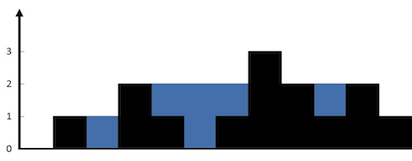

Input: height = [0,1,0,2,1,0,1,3,2,1,2,1]
Output: 6
Explanation: The above elevation map (black section) is represented by array [0,1,0,2,1,0,1,3,2,1,2,1]. In this case, 6 units of rain water (blue section) are being trapped.

Example 2:
Input: height = [4,2,0,3,2,5]
Output: 9
 

Constraints:

n == height.length
1 <= n <= 2 * 10^4
0 <= height[i] <= 10^5

## 215. Kth Largest Element in an Array
Given an integer array nums and an integer k, return the kth largest element in the array. Note that it is the kth largest element in the sorted order, not the kth distinct element. You must solve it in O(n) time complexity.

Example 1:

Input: nums = [3,2,1,5,6,4], k = 2
Output: 5
Example 2:

Input: nums = [3,2,3,1,2,4,5,5,6], k = 4
Output: 4
 

Constraints:

1 <= k <= nums.length <= 10^5
-104 <= nums[i] <= 10^4

In [ ]:
def findKthLargest(nums, k):
    """
    :type nums: List[int]
    :type k: int
    :rtype: int
    """


## 253. Meeting Rooms II
Given an array of meeting time intervals intervals where intervals[i] = [starti, endi], return the minimum number of conference rooms required.

Example 1:

Input: intervals = [[0,30],[5,10],[15,20]]
Output: 2
Example 2:

Input: intervals = [[7,10],[2,4]]
Output: 1

Constraints:

1 <= intervals.length <= 10^4
0 <= starti < endi <= 10^6

In [ ]:
def minMeetingRooms(self, intervals: List[List[int]]) -> int:


## 857. Minimum Cost to Hire K Workers

Solution
There are n workers. You are given two integer arrays quality and wage where quality[i] is the quality of the ith worker and wage[i] is the minimum wage expectation for the ith worker.

We want to hire exactly k workers to form a paid group. To hire a group of k workers, we must pay them according to the following rules:

Every worker in the paid group should be paid in the ratio of their quality compared to other workers in the paid group.
Every worker in the paid group must be paid at least their minimum wage expectation.
Given the integer k, return the least amount of money needed to form a paid group satisfying the above conditions. Answers within 10-5 of the actual answer will be accepted.

 

Example 1:

Input: quality = [10,20,5], wage = [70,50,30], k = 2
Output: 105.00000
Explanation: We pay 70 to 0th worker and 35 to 2nd worker.
Example 2:

Input: quality = [3,1,10,10,1], wage = [4,8,2,2,7], k = 3
Output: 30.66667
Explanation: We pay 4 to 0th worker, 13.33333 to 2nd and 3rd workers separately.
 

Constraints:

n == quality.length == wage.length
1 <= k <= n <= 104
1 <= quality[i], wage[i] <= 104

In [ ]:
def mincostToHireWorkers(quality, wage, K):

## 973. K Closest Points to Origin
Given an array of points where points[i] = [xi, yi] represents a point on the X-Y plane and an integer k, return the k closest points to the origin (0, 0). The distance between two points on the X-Y plane is the Euclidean distance (i.e., √(x1 - x2)2 + (y1 - y2)2). You may return the answer in any order. The answer is guaranteed to be unique (except for the order that it is in).

Example 1:
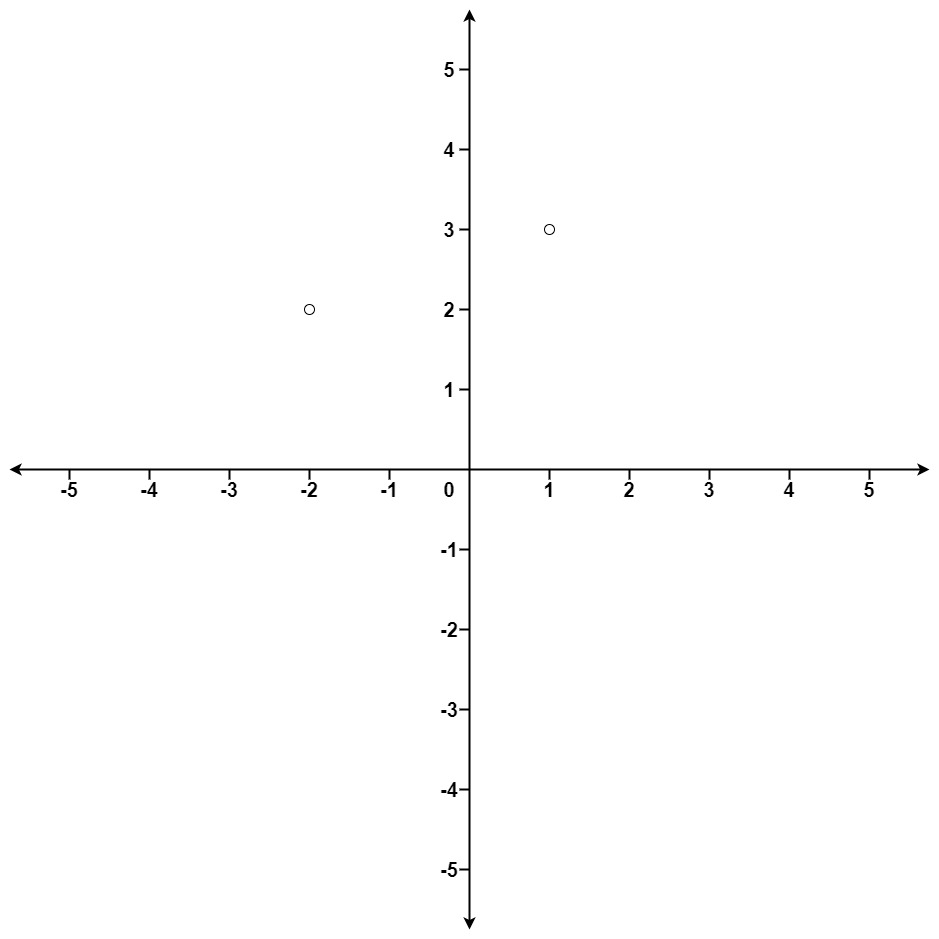
Input: points = [[1,3],[-2,2]], k = 1
Output: [[-2,2]]
Explanation:
The distance between (1, 3) and the origin is sqrt(10).
The distance between (-2, 2) and the origin is sqrt(8).
Since sqrt(8) < sqrt(10), (-2, 2) is closer to the origin.
We only want the closest k = 1 points from the origin, so the answer is just [[-2,2]].

Example 2:
Input: points = [[3,3],[5,-1],[-2,4]], k = 2
Output: [[3,3],[-2,4]]
Explanation: The answer [[-2,4],[3,3]] would also be accepted.

Constraints:
1 <= k <= points.length <= 10^4
-104 < xi, yi < 10^4

In [ ]:
def kClosest(points, K):

# Part II. Linked Lists

### 2. Add Two Numbers
Two non-empty linked lists, one digit per node, represent two non-negative integers in reverse order. Add the two numbers, return sum as a reversed linked list. No leading zero, except the number 0 itself

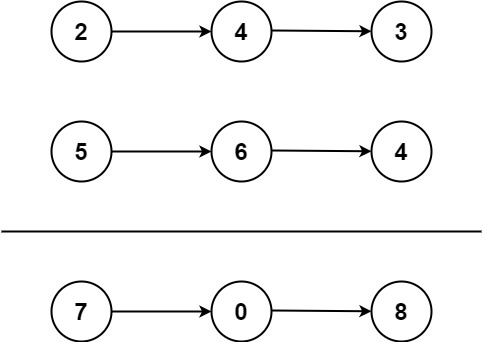

Example 1:
Input: l1 = [2,4,3], l2 = [5,6,4]
Output: [7,0,8]
Explanation: 342 + 465 = 807.

Example 2:
Input: l1 = [0], l2 = [0]
Output: [0]

Example 3:
Input: l1 = [9,9,9,9,9,9,9], l2 = [9,9,9,9]
Output: [8,9,9,9,0,0,0,1]
 

Constraints:
* The number of nodes in each linked list is in the range [1, 100].
* 0 <= Node.val <= 9
* It is guaranteed that the list represents a number that does not have leading zeros EXCEPT FOR NUMBER 0 ITSELF

In [222]:
class Node:    
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def addTwoNumbers2(l1: Optional[Node], l2: Optional[Node]) -> Optional[Node]:

    
# Output: [7,0,8]
l1 = [2,4,3],
l2 = [5,6,4]
n1 = Node(val=2)
n2 = Node(val=4)
n3 = Node(val=3)
n1.next = n2
n2.next = n3

n4 = Node(val=5)
n5 = Node(val=6)
n6 = Node(val=4)
n4.next = n5
n5.next = n6

n_new = addTwoNumbers(n1, n4)
n_new

### 21. Merge Two Sorted Lists
Merge two sorted non-decreasing linked lists, return sorted list by splicing together nodes of the first two lists 

Example 1:
Input: l1 = [1,2,4], l2 = [1,3,4]
Output: [1,1,2,3,4,4]

Example 2:
Input: l1 = [], l2 = []
Output: []

Example 3:
Input: l1 = [], l2 = [0]
Output: [0]

Constraints:
* The number of nodes in both lists is in the range [0, 50].
* -100 <= Node.val <= 100
* Both l1 and l2 are sorted in non-decreasing order

In [243]:
class ListNode:    
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
                
        
def mergeTwoLists(l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:


l1 = [1,2,4]
l2 = [1,3,4]
n1 = Node(val=1)
n2 = Node(val=2)
n3 = Node(val=4)
n1.next = n2
n2.next = n3

n4 = Node(val=1)
n5 = Node(val=3)
n6 = Node(val=4)
n4.next = n5
n5.next = n6

n_new = mergeTwoLists(n1, n4)
n_new

In [244]:
while n_new:
    print(n_new.val, end=' ')
    n_new = n_new.next

1 1 2 3 4 4 

## 138. Copy List with Random Pointer

A linked list of length n is given such that each node contains an additional random pointer, which could point to any node in the list, or null.

Construct a deep copy of the list. The deep copy should consist of exactly n brand new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes X and Y in the original list, where X.random --> Y, then for the corresponding two nodes x and y in the copied list, x.random --> y.

Return the head of the copied linked list.

The linked list is represented in the input/output as a list of n nodes. Each node is represented as a pair of [val, random_index] where:

val: an integer representing Node.val
random_index: the index of the node (range from 0 to n-1) that the random pointer points to, or null if it does not point to any node.

Your code will only be given the head of the original linked list

In [245]:
from collections import defaultdict

class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random

def copyRandomList(head: 'Node') -> 'Node':

    
#head = [[3,null],[3,0],[3,null]]
node_0 = Node(3)
node_1 = Node(3)
node_2 = Node(3)

node_0.next = node_1
node_1.next = node_2

node_1.random = node_0

copyRandomList(node_0)  

## 19. Remove Nth Node From End of List
Given the head of a linked list, remove the nth node from the end of the list and return its head.

Example 1:
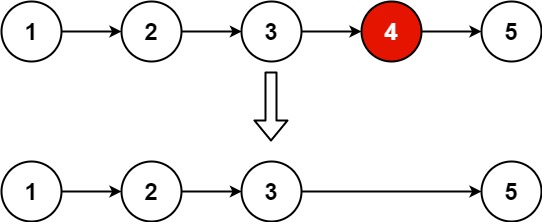
Input: head = [1,2,3,4,5], n = 2
Output: [1,2,3,5]

Example 2:
Input: head = [1], n = 1
Output: []

Example 3:
Input: head = [1,2], n = 1
Output: [1]

Constraints:

The number of nodes in the list is sz.
1 <= sz <= 30
0 <= Node.val <= 100
1 <= n <= sz

Follow up: Could you do this in one pass?

In [ ]:
def removeNthFromEnd(head, n):

# Part III. Trees and Graphs

### 124. Binary Tree Maximum Path Sum
Path in binary tree - sequence of adjacent nodes (connected with edges). A node appears in seq only once. Path does not need to pass through root. Sum path = sum of node's values.

Given root of binary tree, return any max sum path

Example 1:
Input: root = [1,2,3]
Output: 6
Explanation: The optimal path is 2 -> 1 -> 3 with a path sum of 2 + 1 + 3 = 6.

Example 2:
Input: root = [-10,9,20,null,null,15,7]
Output: 42
Explanation: The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.

Constraints:
* The number of nodes in the tree is in the range [1, 3 * 10^4].
* -1000 <= Node.val <= 1000     

In [264]:
# Definition for a binary tree node
class TreeNode:

    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def maxPathSum(root: Optional[TreeNode]) -> int:

### 543. Diameter of Binary Tree
Return the length of the diameter of a binary tree = length of the longest path between any two nodes (may or may not pass through root). Length of a path = num edges

Example 1:
Input: root = [1,2,3,4,5]
Output: 3
Explanation: 3 is the length of the path [4,2,1,3] or [5,2,1,3].

Example 2:
Input: root = [1,2]
Output: 1

Constraints:
* The number of nodes in the tree is in the range [1, 10^4].
* -100 <= Node.val <= 100

In [ ]:
def diameterOfBinaryTree(root: TreeNode) -> int:        

### 200. Number of Islands
Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.
An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

Example 1:
Input: grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]
Output: 1

Example 2:
Input: grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]
Output: 3

Constraints:
* m == grid.length
* n == grid[i].length
* 1 <= m, n <= 300
* grid[i][j] is '0' or '1'

__Bried solution from Discussion. Didn't have time to go over it__

In [ ]:
def numIslands(grid: List[List[str]]) -> int:
    
    
    
grid = [ ["1","1","0","0","0"],
         ["1","1","0","0","0"],
         ["0","0","1","0","0"],
         ["0","0","0","1","1"], ]
print(numIslands(grid))               # 3

## 127. Word Ladder
A transformation sequence from word beginWord to word endWord using a dictionary wordList is a sequence of words beginWord -> s1 -> s2 -> ... -> sk such that:

Every adjacent pair of words differs by a single letter.
Every si for 1 <= i <= k is in wordList. Note that beginWord does not need to be in wordList.
sk == endWord
Given two words, beginWord and endWord, and a dictionary wordList, return the number of words in the shortest transformation sequence from beginWord to endWord, or 0 if no such sequence exists.

Example 1:
Input: beginWord = "hit", endWord = "cog", wordList = ["hot","dot","dog","lot","log","cog"]
Output: 5
Explanation: One shortest transformation sequence is "hit" -> "hot" -> "dot" -> "dog" -> cog", which is 5 words long.

Example 2:
Input: beginWord = "hit", endWord = "cog", wordList = ["hot","dot","dog","lot","log"]
Output: 0
Explanation: The endWord "cog" is not in wordList, therefore there is no valid transformation sequence.

Constraints:

1 <= beginWord.length <= 10
endWord.length == beginWord.length
1 <= wordList.length <= 5000
wordList[i].length == beginWord.length
beginWord, endWord, and wordList[i] consist of lowercase English letters.
beginWord != endWord
All the words in wordList are unique.

In [ ]:
def ladderLength(beginWord, endWord, wordList):

In [ ]:
beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log","cog"]
print( ladderLength(beginWord, endWord, wordList) )

beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log"]
print( ladderLength(beginWord, endWord, wordList) )

## 210. Course Schedule II

There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1. You are given an array prerequisites where prerequisites[i] = [ai, bi] indicates that you must take course bi first if you want to take course ai.

For example, the pair [0, 1], indicates that to take course 0 you have to first take course 1.
Return the ordering of courses you should take to finish all courses. If there are many valid answers, return any of them. If it is impossible to finish all courses, return an empty array.

Example 1:
Input: numCourses = 2, prerequisites = [[1,0]]
Output: [0,1]
Explanation: There are a total of 2 courses to take. To take course 1 you should have finished course 0. So the correct course order is [0,1].

Example 2:
Input: numCourses = 4, prerequisites = [[1,0],[2,0],[3,1],[3,2]]
Output: [0,2,1,3]
Explanation: There are a total of 4 courses to take. To take course 3 you should have finished both courses 1 and 2. Both courses 1 and 2 should be taken after you finished course 0.
So one correct course order is [0,1,2,3]. Another correct ordering is [0,2,1,3].

Example 3:
Input: numCourses = 1, prerequisites = []
Output: [0]

Constraints:

1 <= numCourses <= 2000
0 <= prerequisites.length <= numCourses * (numCourses - 1)
prerequisites[i].length == 2
0 <= ai, bi < numCourses
ai != bi
All the pairs [ai, bi] are distinct.

In [ ]:
def findOrder(self, numCourses, prerequisites):
    """
    :type numCourses: int
    :type prerequisites: List[List[int]]
    :rtype: List[int]
    """

In [ ]:
numCourses = 4
prerequisites = [[1,0],[2,0],[3,1],[3,2]]
print(findOrder(numCourses, prerequisites))

## 222. Count Complete Tree Nodes
Given the root of a complete binary tree, return the number of the nodes in the tree.
According to Wikipedia, every level, except possibly the last, is completely filled in a complete binary tree, and all nodes in the last level are as far left as possible. It can have between 1 and 2h nodes inclusive at the last level h.
Design an algorithm that runs in less than O(n) time complexity.

Example 1:
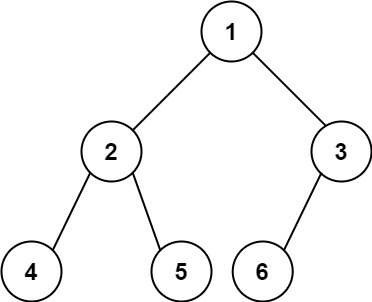
Input: root = [1,2,3,4,5,6]
Output: 6

Example 2:
Input: root = []
Output: 0

Example 3:
Input: root = [1]
Output: 1

Constraints:

The number of nodes in the tree is in the range [0, 5 * 104].
0 <= Node.val <= 5 * 104
The tree is guaranteed to be complete.

In [ ]:
def countNodes(self, root: TreeNode):

## 1110. Delete Nodes And Return Forest
Given the root of a binary tree, each node in the tree has a distinct value. After deleting all nodes with a value in `to_delete` list, we are left with a forest (a disjoint union of trees). Return the roots of the trees in the remaining forest. You may return the result in any order.

Example 1:  
Input: root = [1,2,3,4,5,6,7], to_delete = [3,5]  
Output: [[1,2,null,4],[6],[7]]
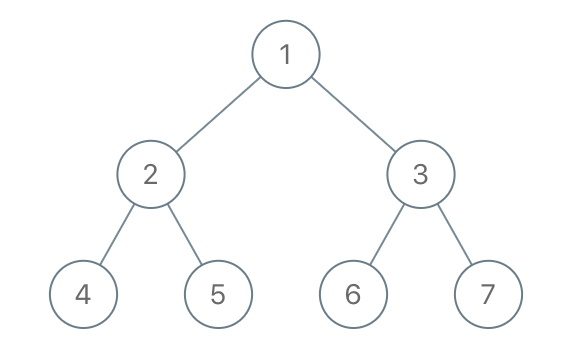

Example 2:  
Input: root = [1,2,4,null,3], to_delete = [3]  
Output: [[1,2,4]]  

Constraints:
* The number of nodes in the given tree is at most 1000.
* Each node has a distinct value between 1 and 1000.
* to_delete.length <= 1000
* to_delete contains distinct values between 1 and 1000.

In [ ]:
def print_tree(tree: List[int]) -> None:
    if not tree:
        return
    print(tree.val, end=' ')
    print_tree(tree.left)
    print_tree(tree.right)

In [ ]:
root = Node(1)
root.left = Node(2)
root.left.left = Node(4)
root.left.right = Node(5)
root.right = Node(3)
root.right.left = Node(6)
root.right.right = Node(7)

to_delete = [3,5]
forest = delNodes(root, to_delete)
for tree in forest:
    print_tree(tree)
    print()

## 329. Longest Increasing Path in a Matrix

Given an m x n integers matrix, return the length of the longest increasing path in matrix.From each cell, you can either move in four directions: left, right, up, or down. You may not move diagonally or move outside the boundary (i.e., wrap-around is not allowed).

Example 1:
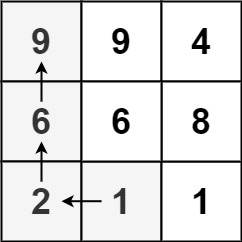
Input: matrix = [[9,9,4],[6,6,8],[2,1,1]]
Output: 4
Explanation: The longest increasing path is [1, 2, 6, 9].

Example 2:
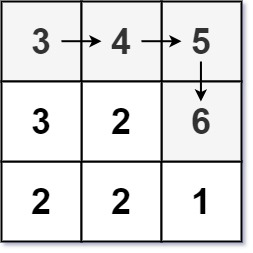
Input: matrix = [[3,4,5],[3,2,6],[2,2,1]]
Output: 4
Explanation: The longest increasing path is [3, 4, 5, 6]. Moving diagonally is not allowed.

Example 3:
Input: matrix = [[1]]
Output: 1

Constraints:

m == matrix.length
n == matrix[i].length
1 <= m, n <= 200
0 <= matrix[i][j] <= 231 - 1



In [62]:
def longestIncreasingPath(matrix):

In [66]:
matrix = [[9,9,4],[6,6,8],[2,1,1]]
print( longestIncreasingPath(matrix) )        # [1, 2, 6, 9]

matrix = [[3,4,5],[3,2,6],[2,2,1]]
print( longestIncreasingPath(matrix) )        # [3, 4, 5, 6]

matrix = [[1]]
print( longestIncreasingPath(matrix) )

4
4
1


## 394. Decode String
Given an encoded string, return its decoded string.
The encoding rule is: k[encoded_string], where the encoded_string inside the square brackets is being repeated exactly k times. Note that k is guaranteed to be a positive integer.

You may assume that the input string is always valid; there are no extra white spaces, square brackets are well-formed, etc. Furthermore, you may assume that the original data does not contain any digits and that digits are only for those repeat numbers, k. For example, there will not be input like 3a or 2[4].

The test cases are generated so that the length of the output will never exceed 10^5.

Example 1:
Input: s = "3[a]2[bc]"
Output: "aaabcbc"

Example 2:
Input: s = "3[a2[c]]"
Output: "accaccacc"

Example 3:
Input: s = "2[abc]3[cd]ef"
Output: "abcabccdcdcdef"

Constraints:

1 <= s.length <= 30
s consists of lowercase English letters, digits, and square brackets '[]'.
s is guaranteed to be a valid input.
All the integers in s are in the range [1, 300]

In [ ]:
def decode_string(s: str) -> str:

In [ ]:
s = "3[a]2[bc]"             # "aaabcbc"
print(decode_string(s))

s = "3[a2[c]]"              # "accaccacc"
print(decode_string(s))

s = "2[abc]3[cd]ef"         # "abcabccdcdcdef"
print(decode_string(s))

## 399. Evaluate Division
You are given an array of variable pairs equations and an array of real numbers values, where equations[i] = [Ai, Bi] and values[i] represent the equation Ai / Bi = values[i]. Each Ai or Bi is a string that represents a single variable.

You are also given some queries, where queries[j] = [Cj, Dj] represents the jth query where you must find the answer for Cj / Dj = ?.

Return the answers to all queries. If a single answer cannot be determined, return -1.0.

Note: The input is always valid. You may assume that evaluating the queries will not result in division by zero and that there is no contradiction.

Example 1:
Input: equations = [["a","b"],["b","c"]], values = [2.0,3.0], queries = [["a","c"],["b","a"],["a","e"],["a","a"],["x","x"]]
Output: [6.00000,0.50000,-1.00000,1.00000,-1.00000]
Explanation: 
Given: a / b = 2.0, b / c = 3.0
queries are: a / c = ?, b / a = ?, a / e = ?, a / a = ?, x / x = ?
return: [6.0, 0.5, -1.0, 1.0, -1.0 ]

Example 2:
Input: equations = [["a","b"],["b","c"],["bc","cd"]], values = [1.5,2.5,5.0], queries = [["a","c"],["c","b"],["bc","cd"],["cd","bc"]]
Output: [3.75000,0.40000,5.00000,0.20000]

Example 3:
Input: equations = [["a","b"]], values = [0.5], queries = [["a","b"],["b","a"],["a","c"],["x","y"]]
Output: [0.50000,2.00000,-1.00000,-1.00000]

Constraints:
1 <= equations.length <= 20
equations[i].length == 2
1 <= Ai.length, Bi.length <= 5
values.length == equations.length
0.0 < values[i] <= 20.0
1 <= queries.length <= 20
queries[i].length == 2
1 <= Cj.length, Dj.length <= 5
Ai, Bi, Cj, Dj consist of lower case English letters and digits

In [ ]:
def calcEquation(equations: List[List[str]], values: List[float], queries: List[List[str]]) -> List[float]:

In [ ]:
equations = [["a","b"],["b","c"]]
values = [2.0,3.0]
queries = [["a","c"],["b","a"],["a","e"],["a","a"],["x","x"]]
print(calcEquation(equations, values, queries))                  # Output: [6.0, 0.5, -1.0, 1.0, -1.0 ]
print()

equations = [["a","b"],["b","c"],["bc","cd"]]
values = [1.5,2.5,5.0]
queries = [["a","c"],["c","b"],["bc","cd"],["cd","bc"]]          # Output: [3.75000,0.40000,5.00000,0.20000]
print(calcEquation(equations, values, queries))
print()

equations = [["a","b"]]
values = [0.5]
queries = [["a","b"],["b","a"],["a","c"],["x","y"]]              # Output: [0.50000,2.00000,-1.00000,-1.00000]
print(calcEquation(equations, values, queries))
print()

## 753. Cracking the Safe
There is a safe protected by a password. The password is a sequence of n digits where each digit can be in the range [0, k - 1].

The safe has a peculiar way of checking the password. When you enter in a sequence, it checks the most recent n digits that were entered each time you type a digit.

For example, the correct password is "345" and you enter in "012345":
After typing 0, the most recent 3 digits is "0", which is incorrect.
After typing 1, the most recent 3 digits is "01", which is incorrect.
After typing 2, the most recent 3 digits is "012", which is incorrect.
After typing 3, the most recent 3 digits is "123", which is incorrect.
After typing 4, the most recent 3 digits is "234", which is incorrect.
After typing 5, the most recent 3 digits is "345", which is correct and the safe unlocks.
Return any string of minimum length that will unlock the safe at some point of entering it.

Example 1:
Input: n = 1, k = 2
Output: "10"
Explanation: The password is a single digit, so enter each digit. "01" would also unlock the safe.

Example 2:
Input: n = 2, k = 2
Output: "01100"
Explanation: For each possible password:
- "00" is typed in starting from the 4th digit.
- "01" is typed in starting from the 1st digit.
- "10" is typed in starting from the 3rd digit.
- "11" is typed in starting from the 2nd digit.
Thus "01100" will unlock the safe. "01100", "10011", and "11001" would also unlock the safe.

Constraints:

1 <= n <= 4
1 <= k <= 10
1 <= kn <= 4096

In [ ]:
def crackSafe(n: int, k: int) -> str:

In [ ]:
n = 1
k = 2        # Output: "10"
print(crackSafe4(n, k))

n = 2
k = 2        # Output: "01100"
print(crackSafe4(n, k))

n = 2
k = 3        # Output:
print(crackSafe4(n, k))

## 489. Robot Room Cleaner
You are controlling a robot that is located somewhere in a room. The room is modeled as an m x n binary grid where 0 represents a wall and 1 represents an empty slot.

The robot starts at an unknown location in the room that is guaranteed to be empty, and you do not have access to the grid, but you can move the robot using the given API Robot.

You are tasked to use the robot to clean the entire room (i.e., clean every empty cell in the room). The robot with the four given APIs can move forward, turn left, or turn right. Each turn is 90 degrees.

When the robot tries to move into a wall cell, its bumper sensor detects the obstacle, and it stays on the current cell.

Design an algorithm to clean the entire room using the following APIs:

interface Robot {
  // returns true if next cell is open and robot moves into the cell.
  // returns false if next cell is obstacle and robot stays on the current cell.
  boolean move();

  // Robot will stay on the same cell after calling turnLeft/turnRight.
  // Each turn will be 90 degrees.
  void turnLeft();
  void turnRight();

  // Clean the current cell.
  void clean();
}
Note that the initial direction of the robot will be facing up. You can assume all four edges of the grid are all surrounded by a wall.

Custom testing:

The input is only given to initialize the room and the robot's position internally. You must solve this problem "blindfolded". In other words, you must control the robot using only the four mentioned APIs without knowing the room layout and the initial robot's position.

Example 1:
Input: room = [[1,1,1,1,1,0,1,1],[1,1,1,1,1,0,1,1],[1,0,1,1,1,1,1,1],[0,0,0,1,0,0,0,0],[1,1,1,1,1,1,1,1]], row = 1, col = 3
Output: Robot cleaned all rooms.
Explanation: All grids in the room are marked by either 0 or 1.
0 means the cell is blocked, while 1 means the cell is accessible.
The robot initially starts at the position of row=1, col=3.
From the top left corner, its position is one row below and three columns right.

Example 2:
Input: room = [[1]], row = 0, col = 0
Output: Robot cleaned all rooms.

Constraints:

m == room.length
n == room[i].length
1 <= m <= 100
1 <= n <= 200
room[i][j] is either 0 or 1.
0 <= row < m
0 <= col < n
room[row][col] == 1
All the empty cells can be visited from the starting position

In [ ]:
def cleanRoom(self, robot):
    """
    :type robot: Robot
    :rtype: None
    """

## 947. Most Stones Removed with Same Row or Column
On a 2D plane, we place n stones at some integer coordinate points. Each coordinate point may have at most one stone.
A stone can be removed if it shares either the same row or the same column as another stone that has not been removed.
Given an array stones of length n where stones[i] = [xi, yi] represents the location of the ith stone, return the largest possible number of stones that can be removed.

Example 1:
Input: stones = [[0,0],[0,1],[1,0],[1,2],[2,1],[2,2]]
Output: 5
Explanation: One way to remove 5 stones is as follows:
1. Remove stone [2,2] because it shares the same row as [2,1].
2. Remove stone [2,1] because it shares the same column as [0,1].
3. Remove stone [1,2] because it shares the same row as [1,0].
4. Remove stone [1,0] because it shares the same column as [0,0].
5. Remove stone [0,1] because it shares the same row as [0,0].
Stone [0,0] cannot be removed since it does not share a row/column with another stone still on the plane.

Example 2:
Input: stones = [[0,0],[0,2],[1,1],[2,0],[2,2]]
Output: 3
Explanation: One way to make 3 moves is as follows:
1. Remove stone [2,2] because it shares the same row as [2,0].
2. Remove stone [2,0] because it shares the same column as [0,0].
3. Remove stone [0,2] because it shares the same row as [0,0].
Stones [0,0] and [1,1] cannot be removed since they do not share a row/column with another stone still on the plane.

Example 3:
Input: stones = [[0,0]]
Output: 0
Explanation: [0,0] is the only stone on the plane, so you cannot remove it.

Constraints:

1 <= stones.length <= 1000
0 <= xi, yi <= 104
No two stones are at the same coordinate point

In [ ]:
def remove_stones(stones: List[List[int]]) -> int:

In [ ]:
stones = [[0,0],[0,1],[1,0],[1,2],[2,1],[2,2]]     # Output: 5
# remove [2,2] (shares row w/[2,1]) -> remove [2,1] (shares col w/[0,1]) -> remove [1,2] (shares row w/[1,0])
# remove [1,0] (shares col w/[0,0]) -> remove [0,1] (shares row w/[0,0]) -> cannot remove [0,0]
print(remove_stones4(stones))

stones = [[0,0],[0,2],[1,1],[2,0],[2,2]]           # Output: 3
# remove [2,2] (shares row w/[2,0]) -> remove [2,0] (shares col w/[0,0]) -> remove [0,2] (shares row w/[0,0])
# cannot remove [0,0] and [1,1]
print(remove_stones4(stones))

stones = [[0,0]]                                   # Output: 0
print(remove_stones4(stones))

## 951. Flip Equivalent Binary Trees
For a binary tree T, we can define a flip operation as follows: choose any node, and swap the left and right child subtrees.

A binary tree X is flip equivalent to a binary tree Y if and only if we can make X equal to Y after some number of flip operations.

Given the roots of two binary trees root1 and root2, return true if the two trees are flip equivalent or false otherwise.

Example 1:
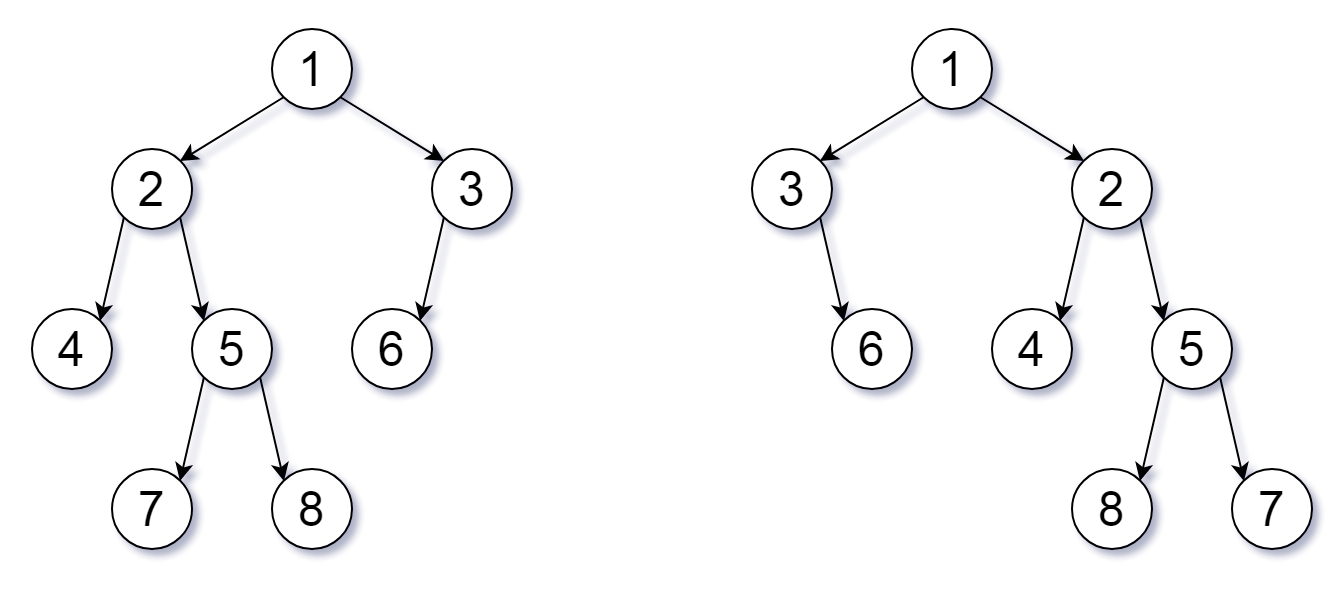
Flipped Trees Diagram
Input: root1 = [1,2,3,4,5,6,null,null,null,7,8], root2 = [1,3,2,null,6,4,5,null,null,null,null,8,7]
Output: true
Explanation: We flipped at nodes with values 1, 3, and 5.

Example 2:
Input: root1 = [], root2 = []
Output: true

Example 3:
Input: root1 = [], root2 = [1]
Output: false

Constraints:

The number of nodes in each tree is in the range [0, 100].
Each tree will have unique node values in the range [0, 99]

In [ ]:
def flipEquiv(root1, root2):

# Part IV. Recursion

## 425. Word Squares
Given an array of unique strings words, return all the word squares you can build from words. The same word from words can be used multiple times. You can return the answer in any order.

A sequence of strings forms a valid word square if the kth row and column read the same string, where 0 <= k < max(numRows, numColumns).

For example, the word sequence ["ball","area","lead","lady"] forms a word square because each word reads the same both horizontally and vertically.

Example 1:

Input: words = ["area","lead","wall","lady","ball"]
Output: [["ball","area","lead","lady"],["wall","area","lead","lady"]]
Explanation:
The output consists of two word squares. The order of output does not matter (just the order of words in each word square matters).

Example 2:
Input: words = ["abat","baba","atan","atal"]
Output: [["baba","abat","baba","atal"],["baba","abat","baba","atan"]]
Explanation:
The output consists of two word squares. The order of output does not matter (just the order of words in each word square matters).

Constraints:

1 <= words.length <= 1000
1 <= words[i].length <= 4
All words[i] have the same length.
words[i] consists of only lowercase English letters.
All words[i] are unique

In [ ]:
def wordSquares(self, words: List[str]) -> List[List[str]]:

## 247. Strobogrammatic Number II
Given an integer n, return all the strobogrammatic numbers that are of length n. You may return the answer in any order.
A strobogrammatic number is a number that looks the same when rotated 180 degrees (looked at upside down).

Example 1:
Input: n = 2
Output: ["11","69","88","96"]

Example 2:
Input: n = 1
Output: ["0","1","8"]

Constraints:

1 <= n <= 14

Hint:  
Try to use recursion and notice that it should recurse with n - 2 instead of n - 1

In [ ]:
def findStrobogrammatic(self, n: int) -> List[str]:

## 212. Word Search II
Given an m x n board of characters and a list of strings words, return all words on the board.

Each word must be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once in a word.

Example 1:
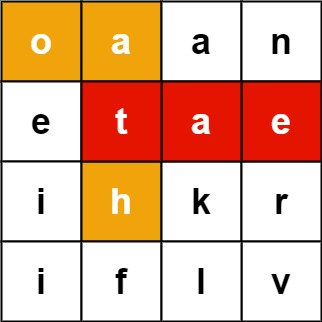
Input: board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"]
Output: ["eat","oath"]

Example 2:

a b
c d

Input: board = [["a","b"],["c","d"]], words = ["abcb"]
Output: []

Constraints:

m == board.length
n == board[i].length
1 <= m, n <= 12
board[i][j] is a lowercase English letter.
1 <= words.length <= 3 * 104
1 <= words[i].length <= 10
words[i] consists of lowercase English letters.
All the strings of words are unique

In [ ]:
def findWords(self, board: List[List[str]], words: List[str]) -> List[str]:

## 351. Android Unlock Patterns
Android devices have a special lock screen with a 3 x 3 grid of dots. Users can set an "unlock pattern" by connecting the dots in a specific sequence, forming a series of joined line segments where each segment's endpoints are two consecutive dots in the sequence. A sequence of k dots is a valid unlock pattern if both of the following are true:

All the dots in the sequence are distinct.
If the line segment connecting two consecutive dots in the sequence passes through the center of any other dot, the other dot must have previously appeared in the sequence. No jumps through the center non-selected dots are allowed.
For example, connecting dots 2 and 9 without dots 5 or 6 appearing beforehand is valid because the line from dot 2 to dot 9 does not pass through the center of either dot 5 or 6.
However, connecting dots 1 and 3 without dot 2 appearing beforehand is invalid because the line from dot 1 to dot 3 passes through the center of dot 2.
Here are some example valid and invalid unlock patterns:
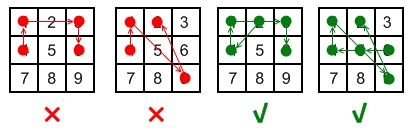
The 1st pattern [4,1,3,6] is invalid because the line connecting dots 1 and 3 pass through dot 2, but dot 2 did not previously appear in the sequence.
The 2nd pattern [4,1,9,2] is invalid because the line connecting dots 1 and 9 pass through dot 5, but dot 5 did not previously appear in the sequence.
The 3rd pattern [2,4,1,3,6] is valid because it follows the conditions. The line connecting dots 1 and 3 meets the condition because dot 2 previously appeared in the sequence.
The 4th pattern [6,5,4,1,9,2] is valid because it follows the conditions. The line connecting dots 1 and 9 meets the condition because dot 5 previously appeared in the sequence.
Given two integers m and n, return the number of unique and valid unlock patterns of the Android grid lock screen that consist of at least m keys and at most n keys.

Two unlock patterns are considered unique if there is a dot in one sequence that is not in the other, or the order of the dots is different.

Example 1:

Input: m = 1, n = 1
Output: 9
Example 2:

Input: m = 1, n = 2
Output: 65
 

Constraints:

1 <= m, n <= 9

No oficcial solution on Leetcode (see comments)

## 17. Letter Combinations of a Phone Number
Given a string containing digits from 2-9 inclusive, return all possible letter combinations that the number could represent. Return the answer in any order.
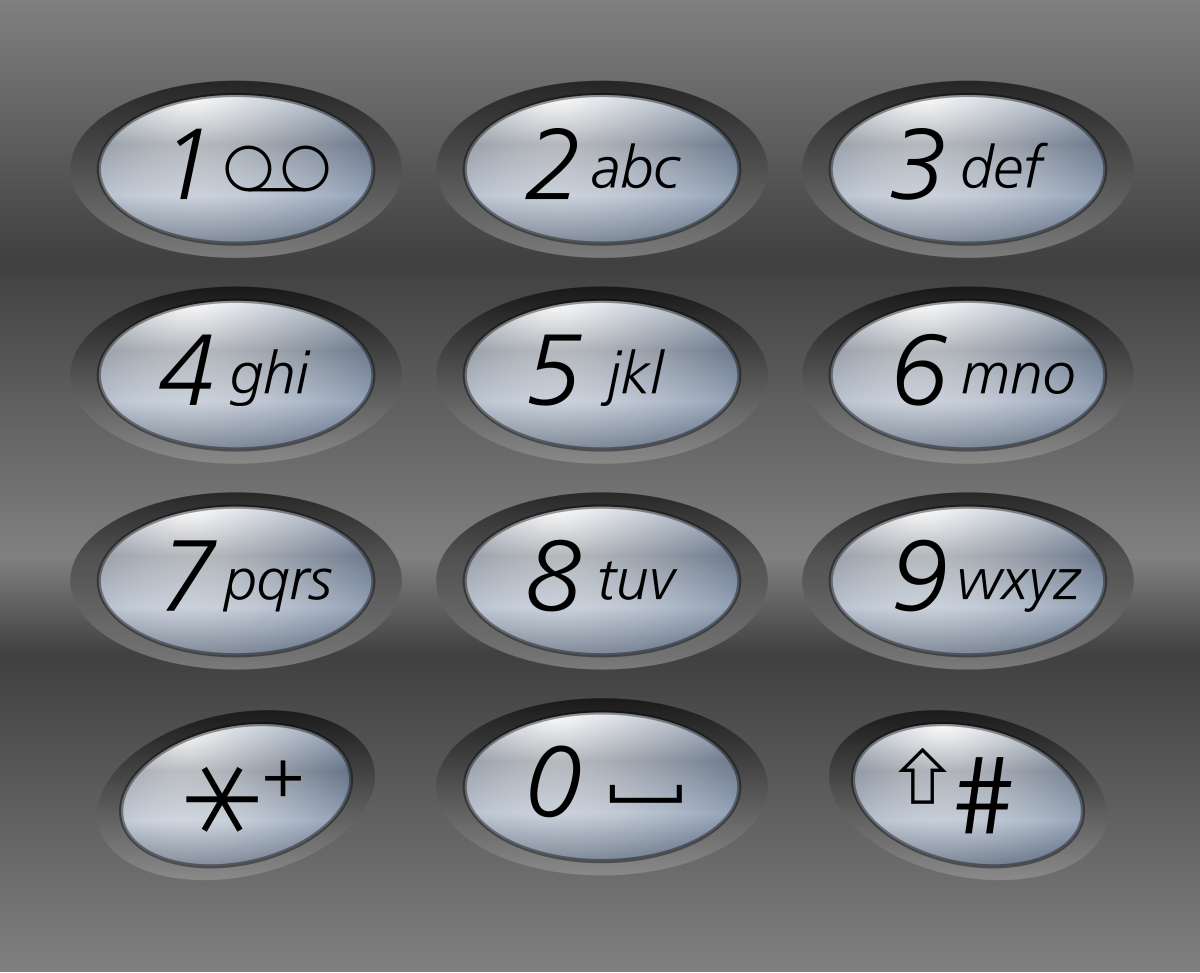
A mapping of digits to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.

Example 1:
Input: digits = "23"
Output: ["ad","ae","af","bd","be","bf","cd","ce","cf"]

Example 2:
Input: digits = ""
Output: []

Example 3:
Input: digits = "2"
Output: ["a","b","c"]

Constraints:

0 <= digits.length <= 4
digits[i] is a digit in the range ['2', '9']

In [ ]:
def letterCombinations(self, digits: str) -> List[str]:

## 22. Generate Parentheses
Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.

Example 1:
Input: n = 3
Output: ["((()))","(()())","(())()","()(())","()()()"]

Example 2:
Input: n = 1
Output: ["()"]

Constraints:

1 <= n <= 8

In [ ]:
def generateParenthesis(self, n: int) -> List[str]:

# Part V. Sorting and Searching

## 4. Median of Two Sorted Arrays
Given two sorted arrays nums1 and nums2 of size m and n respectively, return the median of the two sorted arrays.

The overall run time complexity should be O(log (m+n)).

Example 1:
Input: nums1 = [1,3], nums2 = [2]
Output: 2.00000
Explanation: merged array = [1,2,3] and median is 2.

Example 2:
Input: nums1 = [1,2], nums2 = [3,4]
Output: 2.50000
Explanation: merged array = [1,2,3,4] and median is (2 + 3) / 2 = 2.5.

Constraints:

nums1.length == m
nums2.length == n
0 <= m <= 1000
0 <= n <= 1000
1 <= m + n <= 2000
-10^6 <= nums1[i], nums2[i] <= 10^6

In [ ]:
from typing import List

def median(nums1: List[int], nums2: List[int]) -> float:
    pass
                
                
nums1 = [1,3]
nums2 = [2]
print(median(nums1, nums2))

nums1 = [1,2]
nums2 = [3,4]
print(median(nums1, nums2, ))            

nums1 = [-5, 3, 6, 12, 15]
nums2 = [-12, -10, -6, -3, 4, 10]
print(median(nums1, nums2))

nums1 = [3]
nums2 = [4]
print(median(nums1, nums2))

nums1 = []
nums2 = [3,4]
print(median(nums1, nums2))

nums1 = []
nums2 = []
print(median(nums1, nums2))

## 34. Find First and Last Position of Element in Sorted Array
Given an array of integers nums sorted in non-decreasing order, find the starting and ending position of a given target value.

If target is not found in the array, return [-1, -1].

You must write an algorithm with O(log n) runtime complexity.

Example 1:
Input: nums = [5,7,7,8,8,10], target = 8
Output: [3,4]

Example 2:
Input: nums = [5,7,7,8,8,10], target = 6
Output: [-1,-1]

Example 3:
Input: nums = [], target = 0
Output: [-1,-1]

Constraints:

0 <= nums.length <= 105
-109 <= nums[i] <= 109
nums is a non-decreasing array.
-109 <= target <= 109

## 56. Merge Intervals
Given an array of intervals where intervals[i] = [starti, endi], merge all overlapping intervals, and return an array of the non-overlapping intervals that cover all the intervals in the input.

Example 1:
Input: intervals = [[1,3],[2,6],[8,10],[15,18]]
Output: [[1,6],[8,10],[15,18]]
Explanation: Since intervals [1,3] and [2,6] overlap, merge them into [1,6].

Example 2:
Input: intervals = [[1,4],[4,5]]
Output: [[1,5]]
Explanation: Intervals [1,4] and [4,5] are considered overlapping.

Constraints:

1 <= intervals.length <= 104
intervals[i].length == 2
0 <= starti <= endi <= 104

In [ ]:
def merge(self, intervals: List[List[int]]) -> List[List[int]]:

## 57. Insert Interval
You are given an array of non-overlapping intervals intervals where intervals[i] = [starti, endi] represent the start and the end of the ith interval and intervals is sorted in ascending order by starti. You are also given an interval newInterval = [start, end] that represents the start and end of another interval.

Insert newInterval into intervals such that intervals is still sorted in ascending order by starti and intervals still does not have any overlapping intervals (merge overlapping intervals if necessary).

Return intervals after the insertion.

Example 1:
Input: intervals = [[1,3],[6,9]], newInterval = [2,5]
Output: [[1,5],[6,9]]

Example 2:
Input: intervals = [[1,2],[3,5],[6,7],[8,10],[12,16]], newInterval = [4,8]
Output: [[1,2],[3,10],[12,16]]
Explanation: Because the new interval [4,8] overlaps with [3,5],[6,7],[8,10].

Constraints:

0 <= intervals.length <= 104
intervals[i].length == 2
0 <= starti <= endi <= 105
intervals is sorted by starti in ascending order.
newInterval.length == 2
0 <= start <= end <= 105

In [ ]:
def insert(self, intervals: List[Interval], newInterval: Interval) -> List[Interval]:

## 242. Valid Anagram
See the strings notebook

## 315. Count of Smaller Numbers After Self
Given an integer array nums, return an integer array counts where counts[i] is the number of smaller elements to the right of nums[i].

Example 1:
Input: nums = [5,2,6,1]
Output: [2,1,1,0]
Explanation:
To the right of 5 there are 2 smaller elements (2 and 1).
To the right of 2 there is only 1 smaller element (1).
To the right of 6 there is 1 smaller element (1).
To the right of 1 there is 0 smaller element.

Example 2:
Input: nums = [-1]
Output: [0]

Example 3:
Input: nums = [-1,-1]
Output: [0,0]

Constraints:

1 <= nums.length <= 105
-104 <= nums[i] <= 104

In [ ]:
def countSmaller(self, nums: List[int]) -> List[int]:

## 852. Peak Index in a Mountain Array
An array arr a mountain if the following properties hold:

arr.length >= 3
There exists some i with 0 < i < arr.length - 1 such that:
arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
arr[i] > arr[i + 1] > ... > arr[arr.length - 1]
Given a mountain array arr, return the index i such that arr[0] < arr[1] < ... < arr[i - 1] < arr[i] > arr[i + 1] > ... > arr[arr.length - 1].

You must solve it in O(log(arr.length)) time complexity.

Example 1:
Input: arr = [0,1,0]
Output: 1

Example 2:
Input: arr = [0,2,1,0]
Output: 1

Example 3:
Input: arr = [0,10,5,2]
Output: 1

Constraints:

3 <= arr.length <= 105
0 <= arr[i] <= 106
arr is guaranteed to be a mountain array

In [ ]:
def peakIndexInMountainArray(A):

# Dynamic Programming

## 5. Longest Palindromic Substring
Given a string s, return the longest palindromic substring in s.
A string is called a palindrome string if the reverse of that string is the same as the original string.

Example 1:
Input: s = "babad"
Output: "bab"
Explanation: "aba" is also a valid answer.

Example 2:
Input: s = "cbbd"
Output: "bb"

Constraints:

1 <= s.length <= 1000
s consist of only digits and English letters.

## 53. Maximum Subarray
Given an integer array nums, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum. A subarray is a contiguous part of an array.

Example 1:
Input: nums = [-2,1,-3,4,-1,2,1,-5,4]
Output: 6
Explanation: [4,-1,2,1] has the largest sum = 6.

Example 2:
Input: nums = [1]
Output: 1

Example 3:
Input: nums = [5,4,-1,7,8]
Output: 23

Constraints:

1 <= nums.length <= 105
-104 <= nums[i] <= 104

Follow up: If you have figured out the O(n) solution, try coding another solution using the divide and conquer approach, which is more subtle

In [ ]:
def maxSubArray(self, nums: List[int]) -> int:

## 121. Best Time to Buy and Sell Stock
You are given an array prices where prices[i] is the price of a given stock on the ith day. You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock. Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

Example 1:
Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.

Example 2:
Input: prices = [7,6,4,3,1]
Output: 0
Explanation: In this case, no transactions are done and the max profit = 0.

Constraints:

1 <= prices.length <= 105
0 <= prices[i] <= 104

In [ ]:
def maxProfit(self, prices: List[int]) -> int:

## 152. Maximum Product Subarray
Given an integer array nums, find a contiguous non-empty subarray within the array that has the largest product, and return the product. The test cases are generated so that the answer will fit in a 32-bit integer. A subarray is a contiguous subsequence of the array.

Example 1:
Input: nums = [2,3,-2,4]
Output: 6
Explanation: [2,3] has the largest product 6.

Example 2:
Input: nums = [-2,0,-1]
Output: 0
Explanation: The result cannot be 2, because [-2,-1] is not a subarray.

Constraints:

1 <= nums.length <= 2 * 104
-10 <= nums[i] <= 10
The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer

In [ ]:
def maxProduct(nums: List[int]) -> int:

## 322. Coin Change
You are given an integer array coins representing coins of different denominations and an integer amount representing a total amount of money. Return the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1. You may assume that you have an infinite number of each kind of coin.

Example 1:
Input: coins = [1,2,5], amount = 11
Output: 3
Explanation: 11 = 5 + 5 + 1

Example 2:
Input: coins = [2], amount = 3
Output: -1

Example 3:
Input: coins = [1], amount = 0
Output: 0

Constraints:

1 <= coins.length <= 12
1 <= coins[i] <= 231 - 1
0 <= amount <= 104

In [ ]:
def coinChange(coins: List[int], amount: int) -> int:

## 410. Split Array Largest Sum
Given an integer array nums and an integer k, split nums into k non-empty subarrays such that the largest sum of any subarray is minimized. Return the minimized largest sum of the split. A subarray is a contiguous part of the array.

Example 1:
Input: nums = [7,2,5,10,8], k = 2
Output: 18
Explanation: There are four ways to split nums into two subarrays.
The best way is to split it into [7,2,5] and [10,8], where the largest sum among the two subarrays is only 18.

Example 2:
Input: nums = [1,2,3,4,5], k = 2
Output: 9
Explanation: There are four ways to split nums into two subarrays.
The best way is to split it into [1,2,3] and [4,5], where the largest sum among the two subarrays is only 9.

Constraints:

1 <= nums.length <= 1000
0 <= nums[i] <= 106
1 <= k <= min(50, nums.length)

In [ ]:
def splitArray(nums: List[int], m: int) -> int:

# Part VII. Design

## 146. LRU Cache
Design a data structure that follows the constraints of a Least Recently Used (LRU) cache. Implement the LRUCache class:

LRUCache(int capacity) Initialize the LRU cache with positive size capacity.
int get(int key) Return the value of the key if the key exists, otherwise return -1.
void put(int key, int value) Update the value of the key if the key exists. Otherwise, add the key-value pair to the cache. If the number of keys exceeds the capacity from this operation, evict the least recently used key.
The functions get and put must each run in O(1) average time complexity.

Example 1:

Input
["LRUCache", "put", "put", "get", "put", "get", "put", "get", "get", "get"]
[[2], [1, 1], [2, 2], [1], [3, 3], [2], [4, 4], [1], [3], [4]]
Output
[null, null, null, 1, null, -1, null, -1, 3, 4]

Explanation
LRUCache lRUCache = new LRUCache(2);
lRUCache.put(1, 1); // cache is {1=1}
lRUCache.put(2, 2); // cache is {1=1, 2=2}
lRUCache.get(1);    // return 1
lRUCache.put(3, 3); // LRU key was 2, evicts key 2, cache is {1=1, 3=3}
lRUCache.get(2);    // returns -1 (not found)
lRUCache.put(4, 4); // LRU key was 1, evicts key 1, cache is {4=4, 3=3}
lRUCache.get(1);    // return -1 (not found)
lRUCache.get(3);    // return 3
lRUCache.get(4);    // return 4

Constraints:

1 <= capacity <= 3000
0 <= key <= 104
0 <= value <= 105
At most 2 * 105 calls will be made to get and put

In [ ]:
class LRUCache(object):

    def __init__(self, capacity):
        """
        :type capacity: int
        """
        

    def get(self, key):
        """
        :type key: int
        :rtype: int
        """
        

    def put(self, key, value):
        """
        :type key: int
        :type value: int
        :rtype: None
        """


# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)

## 155. Min Stack
Design a stack that supports push, pop, top, and retrieving the minimum element in constant time.

Implement the MinStack class:

MinStack() initializes the stack object.
void push(int val) pushes the element val onto the stack.
void pop() removes the element on the top of the stack.
int top() gets the top element of the stack.
int getMin() retrieves the minimum element in the stack.
You must implement a solution with O(1) time complexity for each function.

Example 1:

Input
["MinStack","push","push","push","getMin","pop","top","getMin"]
[[],[-2],[0],[-3],[],[],[],[]]

Output
[null,null,null,null,-3,null,0,-2]

Explanation
MinStack minStack = new MinStack();
minStack.push(-2);
minStack.push(0);
minStack.push(-3);
minStack.getMin(); // return -3
minStack.pop();
minStack.top();    // return 0
minStack.getMin(); // return -2

Constraints:

-2^31 <= val <= 2^31 - 1
Methods pop, top and getMin operations will always be called on non-empty stacks.
At most 3 * 104 calls will be made to push, pop, top, and getMin

In [ ]:
class MinStack:

## 297. Serialize and Deserialize Binary Tree
Serialization is the process of converting a data structure or object into a sequence of bits so that it can be stored in a file or memory buffer, or transmitted across a network connection link to be reconstructed later in the same or another computer environment.

Design an algorithm to serialize and deserialize a binary tree. There is no restriction on how your serialization/deserialization algorithm should work. You just need to ensure that a binary tree can be serialized to a string and this string can be deserialized to the original tree structure.

Clarification: The input/output format is the same as how LeetCode serializes a binary tree. You do not necessarily need to follow this format, so please be creative and come up with different approaches yourself.

Example 1:
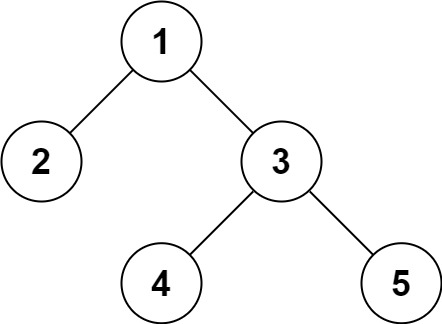
Input: root = [1,2,3,null,null,4,5]
Output: [1,2,3,null,null,4,5]

Example 2:
Input: root = []
Output: []

Constraints:

The number of nodes in the tree is in the range [0, 104].
-1000 <= Node.val <= 1000

In [ ]:
# time = space = O(n)
# Depth First Search (DFS)
class TreeNode(object):
    """ Definition of a binary tree node."""
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
        
# Serialization 
class Codec:

    def serialize(self, root):
        """ Encodes a tree to a single string.
        :type root: TreeNode
        :rtype: str
        """
    
    
# Deserialization 
class Codec:

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        :type data: str
        :rtype: TreeNode
        """

## 359. Logger Rate Limiter
Design a logger system that receives a stream of messages along with their timestamps. Each unique message should only be printed at most every 10 seconds (i.e. a message printed at timestamp t will prevent other identical messages from being printed until timestamp t + 10).

All messages will come in chronological order. Several messages may arrive at the same timestamp.

Implement the Logger class:

Logger() Initializes the logger object.
bool shouldPrintMessage(int timestamp, string message) Returns true if the message should be printed in the given timestamp, otherwise returns false.

Example 1:

Input
["Logger", "shouldPrintMessage", "shouldPrintMessage", "shouldPrintMessage", "shouldPrintMessage", "shouldPrintMessage", "shouldPrintMessage"]
[[], [1, "foo"], [2, "bar"], [3, "foo"], [8, "bar"], [10, "foo"], [11, "foo"]]
Output
[null, true, true, false, false, false, true]

Explanation
Logger logger = new Logger();
logger.shouldPrintMessage(1, "foo");  // return true, next allowed timestamp for "foo" is 1 + 10 = 11
logger.shouldPrintMessage(2, "bar");  // return true, next allowed timestamp for "bar" is 2 + 10 = 12
logger.shouldPrintMessage(3, "foo");  // 3 < 11, return false
logger.shouldPrintMessage(8, "bar");  // 8 < 12, return false
logger.shouldPrintMessage(10, "foo"); // 10 < 11, return false
logger.shouldPrintMessage(11, "foo"); // 11 >= 11, return true, next allowed timestamp for "foo" is 11 + 10 = 21

Constraints:

0 <= timestamp <= 10^9
Every timestamp will be passed in non-decreasing order (chronological order).
1 <= message.length <= 30
At most 10^4 calls will be made to shouldPrintMessage

In [ ]:
# time = O(1), space = O(n) where n is the size of all incoming messages
class Logger(object):

    def __init__(self):
        """
        Initialize your data structure here.
        """

    
    def shouldPrintMessage(self, timestamp, message):
        """
        Returns true if the message should be printed in the given timestamp, otherwise returns false.
        """

## 380. Insert Delete GetRandom O(1)
Implement the RandomizedSet class:

RandomizedSet() Initializes the RandomizedSet object.
bool insert(int val) Inserts an item val into the set if not present. Returns true if the item was not present, false otherwise.
bool remove(int val) Removes an item val from the set if present. Returns true if the item was present, false otherwise.
int getRandom() Returns a random element from the current set of elements (it's guaranteed that at least one element exists when this method is called). Each element must have the same probability of being returned.
You must implement the functions of the class such that each function works in average O(1) time complexity

Example 1:

Input
["RandomizedSet", "insert", "remove", "insert", "getRandom", "remove", "insert", "getRandom"]
[[], [1], [2], [2], [], [1], [2], []]
Output
[null, true, false, true, 2, true, false, 2]

Explanation
RandomizedSet randomizedSet = new RandomizedSet();
randomizedSet.insert(1); // Inserts 1 to the set. Returns true as 1 was inserted successfully.
randomizedSet.remove(2); // Returns false as 2 does not exist in the set.
randomizedSet.insert(2); // Inserts 2 to the set, returns true. Set now contains [1,2].
randomizedSet.getRandom(); // getRandom() should return either 1 or 2 randomly.
randomizedSet.remove(1); // Removes 1 from the set, returns true. Set now contains [2].
randomizedSet.insert(2); // 2 was already in the set, so return false.
randomizedSet.getRandom(); // Since 2 is the only number in the set, getRandom() will always return 2.

Constraints:

-231 <= val <= 231 - 1
At most 2 * 105 calls will be made to insert, remove, and getRandom.
There will be at least one element in the data structure when getRandom is called.

In [ ]:
from random import choice
class RandomizedSet():
    def __init__(self):
        """
        Initialize your data structure here.
        """
        
    def insert(self, val: int) -> bool:
        """
        Inserts a value to the set. Returns true if the set did not already contain the specified element.
        """
 
        

    def remove(self, val: int) -> bool:
        """
        Removes a value from the set. Returns true if the set contained the specified element.
        """


    def getRandom(self) -> int:
        """
        Get a random element from the set.
        """

##  642. Design Search Autocomplete System
Design a search autocomplete system for a search engine. Users may input a sentence (at least one word and end with a special character '#').

You are given a string array sentences and an integer array times both of length n where sentences[i] is a previously typed sentence and times[i] is the corresponding number of times the sentence was typed. For each input character except '#', return the top 3 historical hot sentences that have the same prefix as the part of the sentence already typed.

Here are the specific rules:

The hot degree for a sentence is defined as the number of times a user typed the exactly same sentence before.
The returned top 3 hot sentences should be sorted by hot degree (The first is the hottest one). If several sentences have the same hot degree, use ASCII-code order (smaller one appears first).
If less than 3 hot sentences exist, return as many as you can.
When the input is a special character, it means the sentence ends, and in this case, you need to return an empty list.
Implement the AutocompleteSystem class:

AutocompleteSystem(String[] sentences, int[] times) Initializes the object with the sentences and times arrays.
List<String> input(char c) This indicates that the user typed the character c.
Returns an empty array [] if c == '#' and stores the inputted sentence in the system.
Returns the top 3 historical hot sentences that have the same prefix as the part of the sentence already typed. If there are fewer than 3 matches, return them all.
 

Example 1:

Input
["AutocompleteSystem", "input", "input", "input", "input"]
[[["i love you", "island", "iroman", "i love leetcode"], [5, 3, 2, 2]], ["i"], [" "], ["a"], ["#"]]
Output
[null, ["i love you", "island", "i love leetcode"], ["i love you", "i love leetcode"], [], []]

Explanation
AutocompleteSystem obj = new AutocompleteSystem(["i love you", "island", "iroman", "i love leetcode"], [5, 3, 2, 2]);
obj.input("i"); // return ["i love you", "island", "i love leetcode"]. There are four sentences that have prefix "i". Among them, "ironman" and "i love leetcode" have same hot degree. Since ' ' has ASCII code 32 and 'r' has ASCII code 114, "i love leetcode" should be in front of "ironman". Also we only need to output top 3 hot sentences, so "ironman" will be ignored.
obj.input(" "); // return ["i love you", "i love leetcode"]. There are only two sentences that have prefix "i ".
obj.input("a"); // return []. There are no sentences that have prefix "i a".
obj.input("#"); // return []. The user finished the input, the sentence "i a" should be saved as a historical sentence in system. And the following input will be counted as a new search.
 

Constraints:

n == sentences.length
n == times.length
1 <= n <= 100
1 <= sentences[i].length <= 100
1 <= times[i] <= 50
c is a lowercase English letter, a hash '#', or space ' '.
Each tested sentence will be a sequence of characters c that end with the character '#'.
Each tested sentence will have a length in the range [1, 200].
The words in each input sentence are separated by single spaces.
At most 5000 calls will be made to input
    
No oficial Leetcocde solution (see comments)

# Part VIII. Other

## 7. Reverse Integer
Given a signed 32-bit integer x, return x with its digits reversed. If reversing x causes the value to go outside the signed 32-bit integer range [-231, 231 - 1], then return 0.

Assume the environment does not allow you to store 64-bit integers (signed or unsigned).

Example 1:

Input: x = 123
Output: 321
Example 2:

Input: x = -123
Output: -321
Example 3:

Input: x = 120
Output: 21

Constraints:

-231 <= x <= 231 - 1

In [ ]:
MAX_VALUE = 2147483647
MIN_VALUE = -2147483648

def reverse_integer(num: int) -> int:
        

nums = [123, -123, 120]
for num in nums:
    print(reverse_integer(num))

## 135. Candy
There are n children standing in a line. Each child is assigned a rating value given in the integer array ratings.

You are giving candies to these children subjected to the following requirements:

Each child must have at least one candy.
Children with a higher rating get more candies than their neighbors.
Return the minimum number of candies you need to have to distribute the candies to the children.

Example 1:
Input: ratings = [1,0,2]
Output: 5
Explanation: You can allocate to the first, second and third child with 2, 1, 2 candies respectively.

Example 2:
Input: ratings = [1,2,2]
Output: 4
Explanation: You can allocate to the first, second and third child with 1, 2, 1 candies respectively.
The third child gets 1 candy because it satisfies the above two conditions.

Constraints:

n == ratings.length
1 <= n <= 2 * 10^4
0 <= ratings[i] <= 2 * 10^4

## 205. Isomorphic Strings
Given two strings s and t, determine if they are isomorphic.

Two strings s and t are isomorphic if the characters in s can be replaced to get t.

All occurrences of a character must be replaced with another character while preserving the order of characters. No two characters may map to the same character, but a character may map to itself.

Example 1:
Input: s = "egg", t = "add"
Output: true

Example 2:
Input: s = "foo", t = "bar"
Output: false

Example 3:
Input: s = "paper", t = "title"
Output: true

Constraints:

1 <= s.length <= 5 * 10^4
t.length == s.length
s and t consist of any valid ascii character

In [ ]:
def isIsomorphic(s: str, t: str) -> bool:

## 246. Strobogrammatic Number
Given a string num which represents an integer, return true if num is a strobogrammatic number. A strobogrammatic number is a number that looks the same when rotated 180 degrees (looked at upside down).

Example 1:
Input: num = "69"
Output: true

Example 2:
Input: num = "88"
Output: true

Example 3:
Input: num = "962"
Output: false

Constraints:

1 <= num.length <= 50
num consists of only digits.
num does not contain any leading zeros except for zero itself

In [ ]:
def isStrobogrammatic(num: str) -> bool:

## 299. Bulls and Cows
You are playing the Bulls and Cows game with your friend.

You write down a secret number and ask your friend to guess what the number is. When your friend makes a guess, you provide a hint with the following info:

The number of "bulls", which are digits in the guess that are in the correct position.
The number of "cows", which are digits in the guess that are in your secret number but are located in the wrong position. Specifically, the non-bull digits in the guess that could be rearranged such that they become bulls.
Given the secret number secret and your friend's guess guess, return the hint for your friend's guess.

The hint should be formatted as "xAyB", where x is the number of bulls and y is the number of cows. Note that both secret and guess may contain duplicate digits.

Example 1:
Input: secret = "1807", guess = "7810"
Output: "1A3B"
Explanation: Bulls are connected with a '|' and cows are underlined:
"1807"
  |
"7810"

Example 2:
Input: secret = "1123", guess = "0111"
Output: "1A1B"
Explanation: Bulls are connected with a '|' and cows are underlined:
"1123"        "1123"
  |      or     |
"0111"        "0111"
Note that only one of the two unmatched 1s is counted as a cow since the non-bull digits can only be rearranged to allow one 1 to be a bull.
 

Constraints:

1 <= secret.length, guess.length <= 1000
secret.length == guess.length
secret and guess consist of digits only

In [ ]:
def getHint(self, secret: str, guess: str) -> str:

## 308. Range Sum Query 2D - Mutable
Given a 2D matrix matrix, handle multiple queries of the following types:

Update the value of a cell in matrix.
Calculate the sum of the elements of matrix inside the rectangle defined by its upper left corner (row1, col1) and lower right corner (row2, col2).
Implement the NumMatrix class:

NumMatrix(int[][] matrix) Initializes the object with the integer matrix matrix.
void update(int row, int col, int val) Updates the value of matrix[row][col] to be val.
int sumRegion(int row1, int col1, int row2, int col2) Returns the sum of the elements of matrix inside the rectangle defined by its upper left corner (row1, col1) and lower right corner (row2, col2).

Example 1:
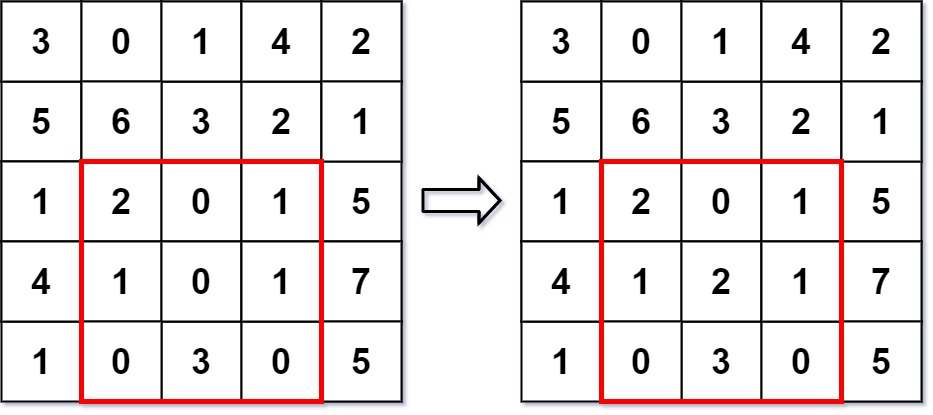
Input
["NumMatrix", "sumRegion", "update", "sumRegion"]
[[[[3, 0, 1, 4, 2], [5, 6, 3, 2, 1], [1, 2, 0, 1, 5], [4, 1, 0, 1, 7], [1, 0, 3, 0, 5]]], [2, 1, 4, 3], [3, 2, 2], [2, 1, 4, 3]]
Output
[null, 8, null, 10]

Explanation
NumMatrix numMatrix = new NumMatrix([[3, 0, 1, 4, 2], [5, 6, 3, 2, 1], [1, 2, 0, 1, 5], [4, 1, 0, 1, 7], [1, 0, 3, 0, 5]]);
numMatrix.sumRegion(2, 1, 4, 3); // return 8 (i.e. sum of the left red rectangle)
numMatrix.update(3, 2, 2);       // matrix changes from left image to right image
numMatrix.sumRegion(2, 1, 4, 3); // return 10 (i.e. sum of the right red rectangle)

Constraints:

m == matrix.length
n == matrix[i].length
1 <= m, n <= 200
-10^5 <= matrix[i][j] <= 10^5
0 <= row < m
0 <= col < n
-10^5 <= val <= 10^5
0 <= row1 <= row2 < m
0 <= col1 <= col2 < n
At most 10^4 calls will be made to sumRegion and update

## 731. My Calendar II
You are implementing a program to use as your calendar. We can add a new event if adding the event will not cause a triple booking.

A triple booking happens when three events have some non-empty intersection (i.e., some moment is common to all the three events.).

The event can be represented as a pair of integers start and end that represents a booking on the half-open interval [start, end), the range of real numbers x such that start <= x < end.

Implement the MyCalendarTwo class:

MyCalendarTwo() Initializes the calendar object.
boolean book(int start, int end) Returns true if the event can be added to the calendar successfully without causing a triple booking. Otherwise, return false and do not add the event to the calendar.

Example 1:

Input
["MyCalendarTwo", "book", "book", "book", "book", "book", "book"]
[[], [10, 20], [50, 60], [10, 40], [5, 15], [5, 10], [25, 55]]
Output
[null, true, true, true, false, true, true]

Explanation
MyCalendarTwo myCalendarTwo = new MyCalendarTwo();
myCalendarTwo.book(10, 20); // return True, The event can be booked. 
myCalendarTwo.book(50, 60); // return True, The event can be booked. 
myCalendarTwo.book(10, 40); // return True, The event can be double booked. 
myCalendarTwo.book(5, 15);  // return False, The event cannot be booked, because it would result in a triple booking.
myCalendarTwo.book(5, 10); // return True, The event can be booked, as it does not use time 10 which is already double booked.
myCalendarTwo.book(25, 55); // return True, The event can be booked, as the time in [25, 40) will be double booked with the third event, the time [40, 50) will be single booked, and the time [50, 55) will be double booked with the second event.

Constraints:

0 <= start < end <= 109
At most 1000 calls will be made to book

In [ ]:
class MyCalendarTwo:
    def __init__(self):


    def book(self, start, end):


## 771. Jewels and Stones
You're given strings jewels representing the types of stones that are jewels, and stones representing the stones you have. Each character in stones is a type of stone you have. You want to know how many of the stones you have are also jewels.

Letters are case sensitive, so "a" is considered a different type of stone from "A".

Example 1:
Input: jewels = "aA", stones = "aAAbbbb"
Output: 3

Example 2:
Input: jewels = "z", stones = "ZZ"
Output: 0

Constraints:

1 <= jewels.length, stones.length <= 50
jewels and stones consist of only English letters.
All the characters of jewels are unique

In [ ]:
def numJewelsInStones(J, S):

## 777. Swap Adjacent in LR String
In a string composed of 'L', 'R', and 'X' characters, like "RXXLRXRXL", a move consists of either replacing one occurrence of "XL" with "LX", or replacing one occurrence of "RX" with "XR". Given the starting string start and the ending string end, return True if and only if there exists a sequence of moves to transform one string to the other.

Example 1:

Input: start = "RXXLRXRXL", end = "XRLXXRRLX"
Output: true
Explanation: We can transform start to end following these steps:
RXXLRXRXL ->
XRXLRXRXL ->
XRLXRXRXL ->
XRLXXRRXL ->
XRLXXRRLX

Example 2:
Input: start = "X", end = "L"
Output: false

Constraints:

1 <= start.length <= 10^4
start.length == end.length
Both start and end will only consist of characters in 'L', 'R', and 'X'

No offical solution on Leetcode (see Leetcode comments)

## 843. Guess the Word
You are given an array of unique strings words where words[i] is six letters long. One word of words was chosen as a secret word.

You are also given the helper object Master. You may call Master.guess(word) where word is a six-letter-long string, and it must be from words. Master.guess(word) returns:

-1 if word is not from words, or an integer representing the number of exact matches (value and position) of your guess to the secret word. There is a parameter allowedGuesses for each test case where allowedGuesses is the maximum number of times you can call Master.guess(word).

For each test case, you should call Master.guess with the secret word without exceeding the maximum number of allowed guesses. You will get:

"Either you took too many guesses, or you did not find the secret word." if you called Master.guess more than allowedGuesses times or if you did not call Master.guess with the secret word, or
"You guessed the secret word correctly." if you called Master.guess with the secret word with the number of calls to Master.guess less than or equal to allowedGuesses.
The test cases are generated such that you can guess the secret word with a reasonable strategy (other than using the bruteforce method).

Example 1:

Input: secret = "acckzz", words = ["acckzz","ccbazz","eiowzz","abcczz"], allowedGuesses = 10
Output: You guessed the secret word correctly.
Explanation:
master.guess("aaaaaa") returns -1, because "aaaaaa" is not in wordlist.
master.guess("acckzz") returns 6, because "acckzz" is secret and has all 6 matches.
master.guess("ccbazz") returns 3, because "ccbazz" has 3 matches.
master.guess("eiowzz") returns 2, because "eiowzz" has 2 matches.
master.guess("abcczz") returns 4, because "abcczz" has 4 matches.
We made 5 calls to master.guess, and one of them was the secret, so we pass the test case.

Example 2:
Input: secret = "hamada", words = ["hamada","khaled"], allowedGuesses = 10
Output: You guessed the secret word correctly.
Explanation: Since there are two words, you can guess both.

Constraints:

1 <= words.length <= 100
words[i].length == 6
words[i] consist of lowercase English letters.
All the strings of wordlist are unique.
secret exists in words.
10 <= allowedGuesses <= 30

No offical solution on Leetcode (see Leetcode comments)

## 939. Minimum Area Rectangle
You are given an array of points in the X-Y plane points where points[i] = [xi, yi].

Return the minimum area of a rectangle formed from these points, with sides parallel to the X and Y axes. If there is not any such rectangle, return 0.

Example 1:
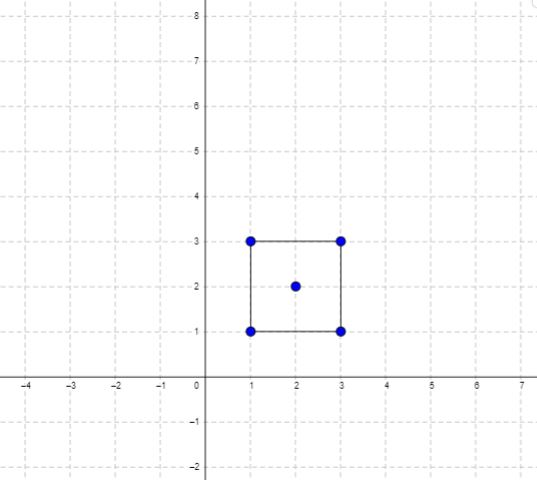
Input: points = [[1,1],[1,3],[3,1],[3,3],[2,2]]
Output: 4

Example 2:
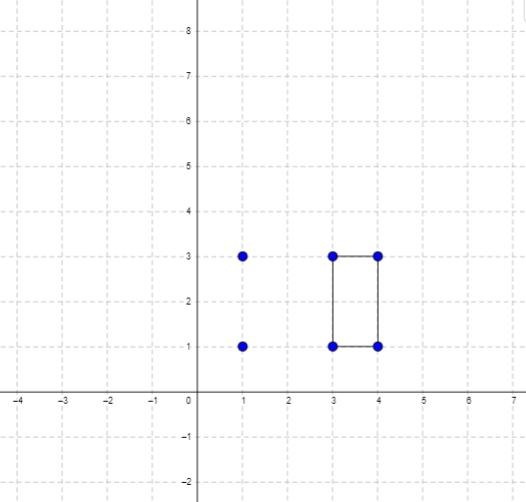
Input: points = [[1,1],[1,3],[3,1],[3,3],[4,1],[4,3]]
Output: 2

Constraints:

1 <= points.length <= 500
points[i].length == 2
0 <= xi, yi <= 4 * 104
All the given points are unique

In [ ]:
def minAreaRect(self, points):

# A Few Problems from the Very First Interview Process Chapter (Simple?)

## 904. Fruit Into Baskets

Solution
You are visiting a farm that has a single row of fruit trees arranged from left to right. The trees are represented by an integer array fruits where fruits[i] is the type of fruit the ith tree produces.

You want to collect as much fruit as possible. However, the owner has some strict rules that you must follow:

You only have two baskets, and each basket can only hold a single type of fruit. There is no limit on the amount of fruit each basket can hold.
Starting from any tree of your choice, you must pick exactly one fruit from every tree (including the start tree) while moving to the right. The picked fruits must fit in one of your baskets.
Once you reach a tree with fruit that cannot fit in your baskets, you must stop.
Given the integer array fruits, return the maximum number of fruits you can pick.

Example 1:

Input: fruits = [1,2,1]
Output: 3
Explanation: We can pick from all 3 trees.
Example 2:

Input: fruits = [0,1,2,2]
Output: 3
Explanation: We can pick from trees [1,2,2].
If we had started at the first tree, we would only pick from trees [0,1].
Example 3:

Input: fruits = [1,2,3,2,2]
Output: 4
Explanation: We can pick from trees [2,3,2,2].
If we had started at the first tree, we would only pick from trees [1,2].

Constraints:

1 <= fruits.length <= 105
0 <= fruits[i] < fruits.length

In [ ]:
def totalFruit(fruits: List[int]) -> int:

## 975. Odd Even Jump
You are given an integer array arr. From some starting index, you can make a series of jumps. The (1st, 3rd, 5th, ...) jumps in the series are called odd-numbered jumps, and the (2nd, 4th, 6th, ...) jumps in the series are called even-numbered jumps. Note that the jumps are numbered, not the indices.

You may jump forward from index i to index j (with i < j) in the following way:

During odd-numbered jumps (i.e., jumps 1, 3, 5, ...), you jump to the index j such that arr[i] <= arr[j] and arr[j] is the smallest possible value. If there are multiple such indices j, you can only jump to the smallest such index j.
During even-numbered jumps (i.e., jumps 2, 4, 6, ...), you jump to the index j such that arr[i] >= arr[j] and arr[j] is the largest possible value. If there are multiple such indices j, you can only jump to the smallest such index j.
It may be the case that for some index i, there are no legal jumps.
A starting index is good if, starting from that index, you can reach the end of the array (index arr.length - 1) by jumping some number of times (possibly 0 or more than once).

Return the number of good starting indices.

Example 1:

Input: arr = [10,13,12,14,15]
Output: 2
Explanation: 
From starting index i = 0, we can make our 1st jump to i = 2 (since arr[2] is the smallest among arr[1], arr[2], arr[3], arr[4] that is greater or equal to arr[0]), then we cannot jump any more.
From starting index i = 1 and i = 2, we can make our 1st jump to i = 3, then we cannot jump any more.
From starting index i = 3, we can make our 1st jump to i = 4, so we have reached the end.
From starting index i = 4, we have reached the end already.
In total, there are 2 different starting indices i = 3 and i = 4, where we can reach the end with some number of
jumps.
Example 2:

Input: arr = [2,3,1,1,4]
Output: 3
Explanation: 
From starting index i = 0, we make jumps to i = 1, i = 2, i = 3:
During our 1st jump (odd-numbered), we first jump to i = 1 because arr[1] is the smallest value in [arr[1], arr[2], arr[3], arr[4]] that is greater than or equal to arr[0].
During our 2nd jump (even-numbered), we jump from i = 1 to i = 2 because arr[2] is the largest value in [arr[2], arr[3], arr[4]] that is less than or equal to arr[1]. arr[3] is also the largest value, but 2 is a smaller index, so we can only jump to i = 2 and not i = 3
During our 3rd jump (odd-numbered), we jump from i = 2 to i = 3 because arr[3] is the smallest value in [arr[3], arr[4]] that is greater than or equal to arr[2].
We can't jump from i = 3 to i = 4, so the starting index i = 0 is not good.
In a similar manner, we can deduce that:
From starting index i = 1, we jump to i = 4, so we reach the end.
From starting index i = 2, we jump to i = 3, and then we can't jump anymore.
From starting index i = 3, we jump to i = 4, so we reach the end.
From starting index i = 4, we are already at the end.
In total, there are 3 different starting indices i = 1, i = 3, and i = 4, where we can reach the end with some
number of jumps.
Example 3:

Input: arr = [5,1,3,4,2]
Output: 3
Explanation: We can reach the end from starting indices 1, 2, and 4.
 

Constraints:

1 <= arr.length <= 2 * 10^4
0 <= arr[i] < 10^5

No solution on Leetcode

## 482. License Key Formatting
You are given a license key represented as a string s that consists of only alphanumeric characters and dashes. The string is separated into n + 1 groups by n dashes. You are also given an integer k.

We want to reformat the string s such that each group contains exactly k characters, except for the first group, which could be shorter than k but still must contain at least one character. Furthermore, there must be a dash inserted between two groups, and you should convert all lowercase letters to uppercase.

Return the reformatted license key.

Example 1:

Input: s = "5F3Z-2e-9-w", k = 4
Output: "5F3Z-2E9W"
Explanation: The string s has been split into two parts, each part has 4 characters.
Note that the two extra dashes are not needed and can be removed.
Example 2:

Input: s = "2-5g-3-J", k = 2
Output: "2-5G-3J"
Explanation: The string s has been split into three parts, each part has 2 characters except the first part as it could be shorter as mentioned above.

Constraints:

1 <= s.length <= 105
s consists of English letters, digits, and dashes '-'.
1 <= k <= 104

No solution on Leetcode

## 929. Unique Email Addresses

Solution
Every valid email consists of a local name and a domain name, separated by the '@' sign. Besides lowercase letters, the email may contain one or more '.' or '+'.

For example, in "alice@leetcode.com", "alice" is the local name, and "leetcode.com" is the domain name.
If you add periods '.' between some characters in the local name part of an email address, mail sent there will be forwarded to the same address without dots in the local name. Note that this rule does not apply to domain names.

For example, "alice.z@leetcode.com" and "alicez@leetcode.com" forward to the same email address.
If you add a plus '+' in the local name, everything after the first plus sign will be ignored. This allows certain emails to be filtered. Note that this rule does not apply to domain names.

For example, "m.y+name@email.com" will be forwarded to "my@email.com".
It is possible to use both of these rules at the same time.

Given an array of strings emails where we send one email to each emails[i], return the number of different addresses that actually receive mails.

Example 1:

Input: emails = ["test.email+alex@leetcode.com","test.e.mail+bob.cathy@leetcode.com","testemail+david@lee.tcode.com"]
Output: 2
Explanation: "testemail@leetcode.com" and "testemail@lee.tcode.com" actually receive mails.
Example 2:

Input: emails = ["a@leetcode.com","b@leetcode.com","c@leetcode.com"]
Output: 3

Constraints:

1 <= emails.length <= 100
1 <= emails[i].length <= 100
emails[i] consist of lowercase English letters, '+', '.' and '@'.
Each emails[i] contains exactly one '@' character.
All local and domain names are non-empty.
Local names do not start with a '+' character.
Domain names end with the ".com" suffix.

In [ ]:
def numUniqueEmails(emails: List[str]) -> int:

## 158. Read N Characters Given read4 II - Call Multiple Times
No official Leetcode solution. Found only a Java solution in the comments. This was actually asked by Facebook according to the comments. Why would someone aks this? Probably disregard :) 

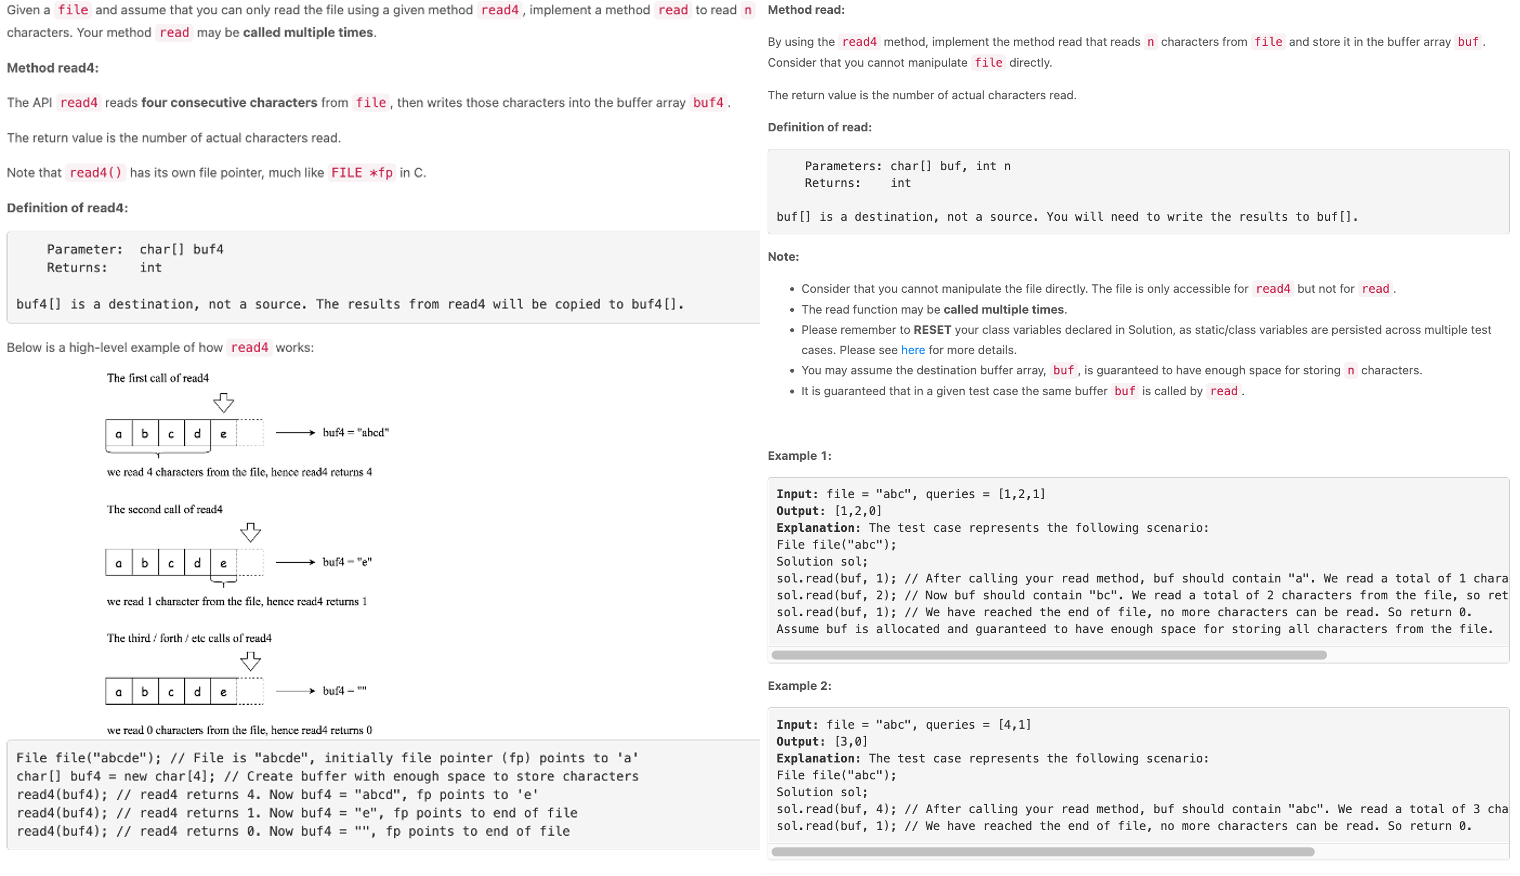

Constraints:
* 1 <= file.length <= 500
* file consist of English letters and digits.
* 1 <= queries.length <= 10
* 1 <= queries[i] <= 500